# ***Netflix Business Case***

In [ ]:
import pandas as pd                                       # Importing the required libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



### Problem Statements
1. Firstly netflix user base needs to be expanded and at the same time reduce the customer acquisition cost.
2. Secondly reducing/optimizing the operational and promotional costs.
3. Deriving the best possible time to release/launch the new TV Show or Movie.
4. Deriving the business performance in different countries and to suggest any best possible changes to optimize the performance and attract new customers.
5. Suggest the best/most favoured category of movies/shows to be launched in a pirticular country and best time to launch.  

## 1. Exploration and Pre processing of the data.

In [ ]:
df=pd.read_csv('netflix.csv')        # Importing the dataset netflix as dataframe and naming it df.

In [ ]:
df.head()                                                 # Having a glimpse of data.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
''' Since in cast, director, country and listed_in columns we have multiple values nested,
    so we need to unnest these columns. '''

' Since in cast, director, country and listed_in columns we have multiple values nested,\n    so we need to unnest these columns. '

In [ ]:
df.shape                                              # Gives the number of rows and columns in the dataset.

(8807, 12)

In [ ]:
df.duplicated().value_counts()                        # Checking for any duplicate records.

False    8807
dtype: int64

### Total content available on the Netflix- 8807 different movies and TV Shows since there are no duplicate values in the titles.

In [ ]:
df.info()                                             # Gives the information about the whole data, null values and datatype of the columns/attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['date_added']= pd.to_datetime(df['date_added'])                  # Changed the date_added datatype to datetime datatype.

In [ ]:
df.isnull().sum()                                                   # Checking for the number of nulls in the whole dataset.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Many nulls in directors, cast and country columns.

In [ ]:
'''Here we cannot directly go on to remove nulls on some columns as they are nested i.e.
   contain multiple values, so we can work on some columns like duration and rating
   to make them free from nulls. '''

'Here we cannot directly go on to remove nulls on some columns as they are nested i.e.\n   contain multiple values, so we can work on some columns like duration and rating\n   to make them free from nulls. '

In [ ]:
''' So working on duration and rating columns to remove nulls.'''

' So working on duration and rating columns to remove nulls.'

In [ ]:
df['duration'].value_counts()                        # Count of all unique values in the duration column

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
df['rating'].value_counts()                          # Count of all unique values in rating column

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Here we can see some errors/inconsistent data in the ratings column

In [ ]:
df.loc[df['rating'].isnull(), 'rating'] = 'NR'                  # Changed the nulls in rating column to NR i.e. Non Rated

Now nulls in rating column are converted to "NR".

In [ ]:
# Actually we can see the duration is mentioned in the rating column probably may be due to some comma mistake.
# So to rectify this we will assign these values to duration and then change the rating to NR for these records.
df[df['rating'].str.contains('min', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### Here we can see that due to some comma error, the data of duration is mentioned in the rating column and the duration column is empty. So we need to rectify this.

In [ ]:
df.at[5541, 'duration'] = df.at[5541, 'rating']        # Assigning the mins value to duration and rating to 'NR' i.e. Non Rated.
df.at[5794, 'duration'] = df.at[5794, 'rating']        # similarly asigning the duration values from rating column
df.at[5813, 'duration'] = df.at[5813, 'rating']

In [ ]:
df[df['rating'].str.contains('min', na=False)]            # Now we have to change the values in rating column since the data present is irrelevant here.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Changing the inconsistant values of rating column to NR value so that data becomes consistent/relevant.
df.at[5541, 'rating'] = 'NR'
df.at[5794, 'rating'] = 'NR'
df.at[5813, 'rating'] = 'NR'

In [ ]:
# Cross checking if all the error values are rectified or not.
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Now we can see no NR values in duration column.
# And duration column will be converted to integer type in the later part.

df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
df['type'].unique()           # Categories available in the type column.

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df['rating'].unique()        # List of unique ratings available on netflix for the content.

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating'].nunique()        # Number of different rating categories on the netflix content.

14

In [ ]:
# Number of different categories amontg which the content is distrubuted.
df['listed_in'].nunique()

514

In [ ]:
df.info()                     # Gives non-null count of all the columns and their datatypes of a dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


### So now duration and rating columns are free from nulls or error values.



---



### Now we need to unnest the columns of director, cast, country and listed_in one by one for further analysis.

In [ ]:
# Firstly, unnesting the director column and creating a seperate row for each director of a movie.

constraint1= df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1= pd.DataFrame(constraint1, index= df['title'])
df_new1= df_new1.stack()
df_new1= pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns= {0:'directors'},inplace=True)
df_new1.drop(['level_1'], axis=1, inplace= True)
df_new1


,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
# Now unnesting the cast column and creating a seperate row for each actor of a movie.

constraint2= df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2= pd.DataFrame(constraint2, index= df['title'])
df_new2= df_new2.stack()
df_new2= pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns= {0:'actors'},inplace=True)
df_new2.drop(['level_1'], axis=1, inplace= True)
df_new2

,title,actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
# Now unnesting the listed_in column and creating seperate record for each genre.

constraint3= df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3= pd.DataFrame(constraint3, index= df['title'])
df_new3= df_new3.stack()
df_new3= pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns= {0:'genre'},inplace=True)
df_new3.drop(['level_1'], axis=1, inplace= True)
df_new3

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
# Finally unnesting the country column and creating seperate record for each country.

constraint4= df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4= pd.DataFrame(constraint4, index= df['title'])
df_new4= df_new4.stack()
df_new4= pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns= {0:'country'},inplace=True)
df_new4.drop(['level_1'], axis=1, inplace= True)
df_new4

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [ ]:
'''Merging the exploded data with title as index and getting all
  the remaining columns into it for further analysis.'''

'Merging the exploded data with title as index and getting all\n  the remaining columns into it for further analysis.'

In [ ]:
# Merging the exploded columns together on the basis of title.

df_new= pd.merge(pd.merge(pd.merge(df_new1, df_new2, on='title'),df_new3, on='title'),df_new4, on='title')

In [ ]:
df_final= df_new.merge(df[['show_id', 'type','title', 'release_year', 'date_added','rating','duration','description']], on=['title'], how='left')    # Merging all remaining columns.

### Finally we get the perfectly unnested dataset named df_final. But null values are yet to be treated.
      

In [ ]:
df_final.shape                               # Unnested data has 201991 rows and 12 columns.

(201991, 12)

In [ ]:
df_final.info()                              # Non-null information of df_final.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         201991 non-null  object        
 1   directors     201991 non-null  object        
 2   actors        201991 non-null  object        
 3   genre         201991 non-null  object        
 4   country       201991 non-null  object        
 5   show_id       201991 non-null  object        
 6   type          201991 non-null  object        
 7   release_year  201991 non-null  int64         
 8   date_added    201833 non-null  datetime64[ns]
 9   rating        201991 non-null  object        
 10  duration      201991 non-null  object        
 11  description   201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


### Actually there are many nulls but their count is not being shown here because the unnesting process has altered the nulls(NaN is changed to nan). So firstly they will be converted back to nulls and then only the process to treat nulls can be commenced.

In [ ]:
df_final.head()                  # Finally getting all the attributes exploded/unnested.

,title,directors,actors,genre,country,show_id,type,release_year,date_added,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,2020,2021-09-25,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


### Now there is no more cast column, its replaced by actors column.

In [ ]:
# Replacing the nan values to nulls for easier analysis.
df_final = df_final.replace('nan', np.nan)
df_final.head()

,title,directors,actors,genre,country,show_id,type,release_year,date_added,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,United States,s1,Movie,2020,2021-09-25,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,NaN,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,NaN,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,NaN,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
'''Now we can work on the nulls.'''

'Now we can work on the nulls.'



---



### Nulls imputation

In [ ]:
# We have many nulls in many columns, so we need to rectify the nulls taking each attribute at a time.
df_final.isnull().sum()

title               0
directors       50643
actors           2146
genre               0
country         11897
show_id             0
type                0
release_year        0
date_added        158
rating              0
duration            0
description         0
dtype: int64

In [ ]:
''' Here we also have date_added column which has missing values or nulls,
so we need to impute the date column on the basis of release year.
We need to check the mode of the date_added column for that pirticular year
and then impute the date column.'''

' Here we also have date_added column which has missing values or nulls,\nso we need to impute the date column on the basis of release year.\nWe need to check the mode of the date_added column for that pirticular year\nand then impute the date column.'

In [ ]:
# Imputing the date_added column on the basis of the release_year column by finding the mode of the unique date_added
# for the release year which has the null value at the date_added column at some other record.

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i, 'date_added'].fillna(imp)


In [ ]:
# No more nulls/missing values in date_added column.
df_final['date_added'].isnull().sum()

0

Now we need to first rectify the nulls in directors and actors coulmns because we need these columns to fillup nulls in country column etc.

In [ ]:
df_final.head()                           # data preview.

,title,directors,actors,genre,country,show_id,type,release_year,date_added,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,United States,s1,Movie,2020,2021-09-25,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,NaN,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,NaN,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,NaN,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
''' To impute the nulls in the directors column, we need actors and genre column, as to fillup the nulls in director column,
     we need to take the mode of actors having non-null directors and then getting the most frequent/suitable value. And the
     still remaining nulls will be filled up on the basis of genre.'''

' To impute the nulls in the directors column, we need actors and genre column, as to fillup the nulls in director column,\n     we need to take the mode of actors having non-null directors and then getting the most frequent/suitable value. And the\n     still remaining nulls will be filled up on the basis of genre.'

In [ ]:
# Imputing the directors column on the basis of actors, i.e. whereever the director is null we take up the actor of that record and
# find the mode of directors with whom he worked earlier and pick up the director who worked with that pirticular actor most of the times
# and assign that value to the null record to get the best possible replacement of the null.

for actor in df_final[df_final['directors'].isnull()]['actors'].unique():
  if actor in df_final[~df_final['directors'].isnull()]['actors'].unique():
    imp= df_final[df_final['actors']==actor]['directors'].mode().values[0]
    df_final.loc[df_final['actors']==actor,'directors'] = df_final.loc[df_final['actors']==actor,'directors'].fillna(imp)

In [ ]:
df_final['directors'].isnull().sum()                  # Still some nulls are remaining in the directors column.

32916

In [ ]:
# Imputing the directors column on the basis of genre bcz there may be many directors who
# generally work on same kind of projects or same genre for a long time.

for gen in df_final[df_final['directors'].isnull()]['genre'].unique():
  if gen in df_final[~df_final['directors'].isnull()]['genre'].unique():
    imp= df_final[df_final['genre']==gen]['directors'].mode().values[0]
    df_final.loc[df_final['genre']==gen,'directors'] = df_final.loc[df_final['genre']==gen,'directors'].fillna(imp)

In [ ]:
df_final.isnull().sum()

title               0
directors           0
actors           2146
genre               0
country         11897
show_id             0
type                0
release_year        0
date_added          0
rating              0
duration            0
description         0
dtype: int64

Now Directors column is free of nulls.

In [ ]:
'''Removing Nulls from country column.'''

'Removing Nulls from country column.'

In [ ]:
df_final['country'].isnull().sum()             # Many nulls in country column

11897

In [ ]:
''' Now we need to impute the country column on the basis of directors and actors. As there are null values in directors column,
    so we can check for the director whose other movies have a country, and find the mode for that and we get the most
    suitable director/actors for the missing record. '''

' Now we need to impute the country column on the basis of directors and actors. As there are null values in directors column,\n    so we can check for the director whose other movies have a country, and find the mode for that and we get the most\n    suitable director/actors for the missing record. '

In [ ]:
# Imputing the country column on the basis of director since we can say that whereever there are nulls in the country, we can
# impute the nulls from directors and actors column because
# the movie/series is most possibly directed/produced in that country itself where the cast and director belongs.

for director in df_final[df_final['country'].isnull()]['directors'].unique():
  if director in df_final[~df_final['country'].isnull()]['directors'].unique():
    imp= df_final[df_final['directors']==director]['country'].mode().values[0]
    df_final.loc[df_final['directors']==director, 'country'] = df_final.loc[df_final['directors']==director,'country'].fillna(imp)

In [ ]:
df_final['country'].isnull().sum()     # Still there are 2665 nulls in country column.

2665

In [ ]:
''' Because there might be many directors who had only 1 occurance in the dataset.
    For that case we can also consider the actors country and fillup the nulls
    with the mode of actor's country. '''

" Because there might be many directors who had only 1 occurance in the dataset.\n    For that case we can also consider the actors country and fillup the nulls\n    with the mode of actor's country. "

In [ ]:
# Imputing the country column on the basis of the mode of actors country.

for actor in df_final[df_final['country'].isnull()]['actors'].unique():
  if actor in df_final[~df_final['country'].isnull()]['actors'].unique():
    imp=df_final[df_final['actors']==actor]['country'].mode().values[0]
    df_final.loc[df_final['actors']==actor,'country'] = df_final.loc[df_final['actors']==actor, 'country'].fillna(imp)
# If there are still nulls, then i would replace them with unknown country.

In [ ]:
df_final['country'].isnull().sum()           # Checking for remaining nulls in country column.

1506

In [ ]:
''' We can stil see some nulls in the country column and we cannot
fill them with random values. So we can fill those remaining nulls
with 'Unknown Country'. '''

" We can stil see some nulls in the country column and we cannot\nfill them with random values. So we can fill those remaining nulls\nwith 'Unknown Country'. "

In [ ]:
df_final['country'].fillna('Unknown Country', inplace=True)         # Filling the remaining nulls of country with Unknown Country.
df_final.isnull().sum()                                             # Checking for remaining nulls.

title              0
directors          0
actors          2146
genre              0
country            0
show_id            0
type               0
release_year       0
date_added         0
rating             0
duration           0
description        0
dtype: int64

In [ ]:
# Checking the country names
# We can see there is a comma with country name US so its treated as a different country. So we need to rectify this.
df_final['country'].value_counts()

United States     62506
India             24270
United Kingdom    13090
Japan             10636
France             8426
                  ...  
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
United States,        1
Name: country, Length: 128, dtype: int64

In [ ]:
# Removing the comma from United Stated.
df_final['country'] = df_final['country'].str.replace(',', '')

In [ ]:
df_final['country'].value_counts()                      # Rectified the country column errors.

United States     62507
India             24270
United Kingdom    13110
Japan             10636
France             8426
                  ...  
Panama                2
Mongolia              2
Kazakhstan            1
Uganda                1
Nicaragua             1
Name: country, Length: 124, dtype: int64

In [ ]:
df_final['country'].nunique()

124

### ***Insights***- Currently netflix is operating in 124 countries as per the data.

In [ ]:
''' We still have nulls remaining in actors column.
    Now imputing the nulls in the actors column on the basis of directors and country.'''

' We still have nulls remaining in actors column.\n    Now imputing the nulls in the actors column on the basis of directors and country.'

In [ ]:
# Imputing the actors column on the basis of directors.
for director in df_final[df_final['actors'].isnull()]['directors'].unique():
  if director in df_final[~df_final['actors'].isnull()]['directors'].unique():
    imp= df_final[df_final['directors']==director]['actors'].mode().values[0]
    df_final.loc[df_final['directors']==director, 'actors'] = df_final.loc[df_final['directors']==director,'actors'].fillna(imp)

In [ ]:
df_final.isnull().sum()                   # Still some nulls are remaining.

title              0
directors          0
actors          1218
genre              0
country            0
show_id            0
type               0
release_year       0
date_added         0
rating             0
duration           0
description        0
dtype: int64

In [ ]:
'''There are still many nulls in actors column. So now  i will try to impute the actors column on the basis of country.'''

'There are still many nulls in actors column. So now  i will try to impute the actors column on the basis of country.'

In [ ]:
# Imputing the actors column on the basis of their country.
for cunt in df_final[df_final['actors'].isnull()]['country'].unique():
  if cunt in df_final[~df_final['actors'].isnull()]['country'].unique():
    imp= df_final[df_final['country']==cunt]['actors'].mode().values[0]
    df_final.loc[df_final['country']==cunt, 'actors'] = df_final.loc[df_final['country']==cunt,'actors'].fillna(imp)

In [ ]:
df_final.isnull().sum()

title            0
directors        0
actors          12
genre            0
country          0
show_id          0
type             0
release_year     0
date_added       0
rating           0
duration         0
description      0
dtype: int64

In [ ]:
''' Still 13 nulls are there in the actors column.
    Now I will try to impute the actors column with genre to fillup the remaining nulls. '''

' Still 13 nulls are there in the actors column.\n    Now I will try to impute the actors column with genre to fillup the remaining nulls. '

In [ ]:
# Imputing the actors column on the basis of their genre.
for gene in df_final[df_final['actors'].isnull()]['genre'].unique():
  if gene in df_final[~df_final['actors'].isnull()]['genre'].unique():
    imp= df_final[df_final['genre']==gene]['actors'].mode().values[0]
    df_final.loc[df_final['genre']==gene, 'actors'] = df_final.loc[df_final['genre']==gene,'actors'].fillna(imp)

In [ ]:
df_final.isnull().sum()          # All the nulls are now imputed and now we are ready for the analyze the data and get insights.

title           0
directors       0
actors          0
genre           0
country         0
show_id         0
type            0
release_year    0
date_added      0
rating          0
duration        0
description     0
dtype: int64

### Now all the nulls have been imputed with the most suitable values

-------------------------------------------------------

In [ ]:
df_final.head()          # data preview.

,title,directors,actors,genre,country,show_id,type,release_year,date_added,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,Documentaries,United States,s1,Movie,2020,2021-09-25,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Hiroyuki Seshita,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Houda Benyamina,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Rob Seidenglanz,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Hiroyuki Seshita,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021,2021-09-24,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


### Since we wont need the description and show_id columns anywhere in our analysis,so we can drop these columns.

In [ ]:
df_final = df_final.drop(columns = ['description','show_id']) # Dropping the show_id and desc columns.

In [ ]:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
''' Here we can see that the duration column is not in integer format which can hinder the analysis,
    So we need to change the duration column format by removing the min and converting it into integer datatype
    Also the seasons are mentioned in this column'''

' Here we can see that the duration column is not in integer format which can hinder the analysis,\n    So we need to change the duration column format by removing the min and converting it into integer datatype\n    Also the seasons are mentioned in this column'

In [ ]:
# Removing the min suffix for the duration column.
df_final['duration'] = df_final['duration'].str.replace(' min','')
df_final.head()

,title,directors,actors,genre,country,type,release_year,date_added,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,Documentaries,United States,Movie,2020,2021-09-25,PG-13,90
1,Blood & Water,Hiroyuki Seshita,Ama Qamata,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,2 Seasons
2,Blood & Water,Houda Benyamina,Ama Qamata,TV Dramas,South Africa,TV Show,2021,2021-09-24,TV-MA,2 Seasons
3,Blood & Water,Rob Seidenglanz,Ama Qamata,TV Mysteries,South Africa,TV Show,2021,2021-09-24,TV-MA,2 Seasons
4,Blood & Water,Hiroyuki Seshita,Khosi Ngema,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,2 Seasons


In [ ]:
df_final['duration'].unique()                # We can see still we have inconsistenct in data bcz of seasons.

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [ ]:
''' Since we can see some inconsistency in the duration due to seasons, so
  we can make the seasons as 0 in a copy column of duration so that we wont loose any data. '''

' Since we can see some inconsistency in the duration due to seasons, so\n  we can make the seasons as 0 in a copy column of duration so that we wont loose any data. '

In [ ]:
# try. either this is correct
# Replacing all the seasons with 0 so that the data becomes consistant.
df_final.loc[df_final['duration'].str.contains('Seasons', na=False), 'duration'] = 0
df_final.loc[df_final['duration'].str.contains('Season', na=False), 'duration']=0
df_final['duration'] =df_final['duration'].astype('int')                                        # Changing datatype to int.

In [ ]:
df_final['duration'].unique()                  # Now its all ok.

array([ 90,   0,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,
        97, 106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,
        88, 100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,
        92,  80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154,
       120,  82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135,
       136, 165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148,
       189, 141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,
        39,  46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,
        49,  58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,
        33,  15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181,
       185,  21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,
        57,  28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17,
       203,  41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208,
       180, 144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  1

In [ ]:
df_final['duration'].info()                        # Datatype of duration is integer now.

<class 'pandas.core.series.Series'>
Int64Index: 201991 entries, 0 to 201990
Series name: duration
Non-Null Count   Dtype
--------------   -----
201991 non-null  int32
dtypes: int32(1)
memory usage: 2.3 MB


In [ ]:
df_final['duration'].describe()                    # Some interesting stats of the duration attribute.

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration, dtype: float64

Here we can see that minimum duration is shown as 0 but its actually the seasons for which we imputed the duration as 0. and maximum duration is 312 minutes. Lets find the minimum non zero duration of movie and get a glimpse of them.

In [ ]:
# Minimum non-zero duration of a movie.
df_nonzero = df_final[df_final['duration']>0]
df_min = df_nonzero['duration'].min()
df_min

3

In [ ]:
# Movie of minimum duration.
df_final[df_final['duration']==3]['title'].unique()

array(['Silent'], dtype=object)

### ***Insights***- Shortest movie- Silent and its duration is of 3 minutes.

In [ ]:
# Movie of maximum duration.
df_final[df_final['duration']==312]['title'].unique()

array(['Black Mirror: Bandersnatch'], dtype=object)

### ***Insights***- Longest movie-  Black Mirror and its duration is of 312 minutes.

In [ ]:
df_final.head()

,title,directors,actors,genre,country,type,release_year,date_added,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,Documentaries,United States,Movie,2020,2021-09-25,PG-13,90
1,Blood & Water,Hiroyuki Seshita,Ama Qamata,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0
2,Blood & Water,Houda Benyamina,Ama Qamata,TV Dramas,South Africa,TV Show,2021,2021-09-24,TV-MA,0
3,Blood & Water,Rob Seidenglanz,Ama Qamata,TV Mysteries,South Africa,TV Show,2021,2021-09-24,TV-MA,0
4,Blood & Water,Hiroyuki Seshita,Khosi Ngema,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0


In [ ]:
''' Although we have tha date with us but still we need in which week or month of the year
    is the movie released on the platform for better analysis. So we need to extract
    the week of the year.     '''

' Although we have tha date with us but still we need in which week or month of the year\n    is the movie released on the platform for better analysis. So we need to extract\n    the week of the year.     '

In [ ]:
df_final['week_num'] = df_final['date_added'].dt.isocalendar().week   # Getting the week num of the year

In [ ]:
df_final['week_num'] = df_final['week_num'].astype('int')

In [ ]:
df_final['month'] = df_final['date_added'].dt.month

In [ ]:
df_final['year'] = df_final['date_added'].dt.year

In [ ]:
df_final.head()      # week_num, month and year columns added to df_final.

,title,directors,actors,genre,country,type,release_year,date_added,rating,duration,week_num,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,Documentaries,United States,Movie,2020,2021-09-25,PG-13,90,38,9,2021
1,Blood & Water,Hiroyuki Seshita,Ama Qamata,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
2,Blood & Water,Houda Benyamina,Ama Qamata,TV Dramas,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
3,Blood & Water,Rob Seidenglanz,Ama Qamata,TV Mysteries,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
4,Blood & Water,Hiroyuki Seshita,Khosi Ngema,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021


In [ ]:
''' Now we are ready with the clean data for exploratory analysis and to draw insights from the charts.'''

' Now we are ready with the clean data for exploratory analysis and to draw insights from the charts.'



---



## 2. Analysis and Data Visualization.

In [ ]:
''' Starting with the distribution of the films as per the duration. '''

' Starting with the distribution of the films as per the duration. '

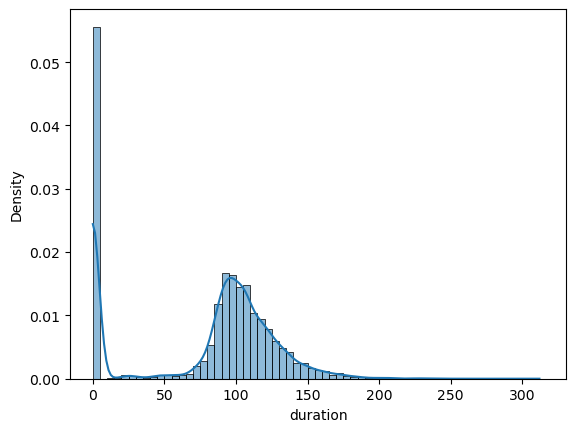

In [ ]:
sns.histplot(x=df_final['duration'], binwidth=5, kde=True, stat= 'density')            # Univarant analysis of the duration.
plt.show()

### *Insights*- Netflix is focusing a lot on the TV Shows rather that the movies. Lots of TV Shows are available on the platform. And movies are mostly of the duration 80-120 minutes.


In [ ]:
'''Now lets see the number of movies and series(content) made of each rating. '''

'Now lets see the number of movies and series(content) made of each rating. '

In [ ]:
df_rat = df_final.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)
df_rat

,rating,title
8,TV-MA,3207
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,307
3,PG,287
7,TV-G,220
2,NR,87


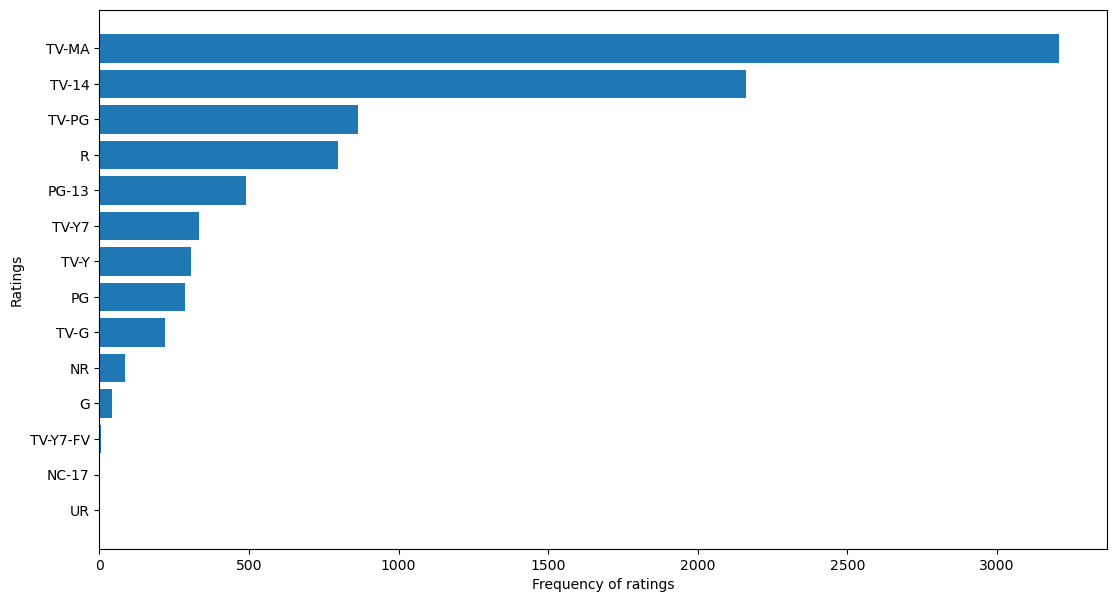

In [ ]:
# ploting top ratings frequency for both movies and tv shows.
plt.figure(figsize=(13,7))
plt.barh(df_rat[::-1]['rating'],df_rat[::-1]['title'])
plt.xlabel('Frequency of ratings')
plt.ylabel('Ratings')
plt.show()

### ***Insights***- There are 14 different types of ratings available and Most of the movies and TV shows available on Netflix are of TV-MA or TV-14 rating. Least used ratings are NC-17 and UR.

In [ ]:
''' Now lets see the number of movies/series produced with respect to the genre. '''

' Now lets see the number of movies/series produced with respect to the genre. '

In [ ]:
df_final.groupby(['genre']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)

,genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


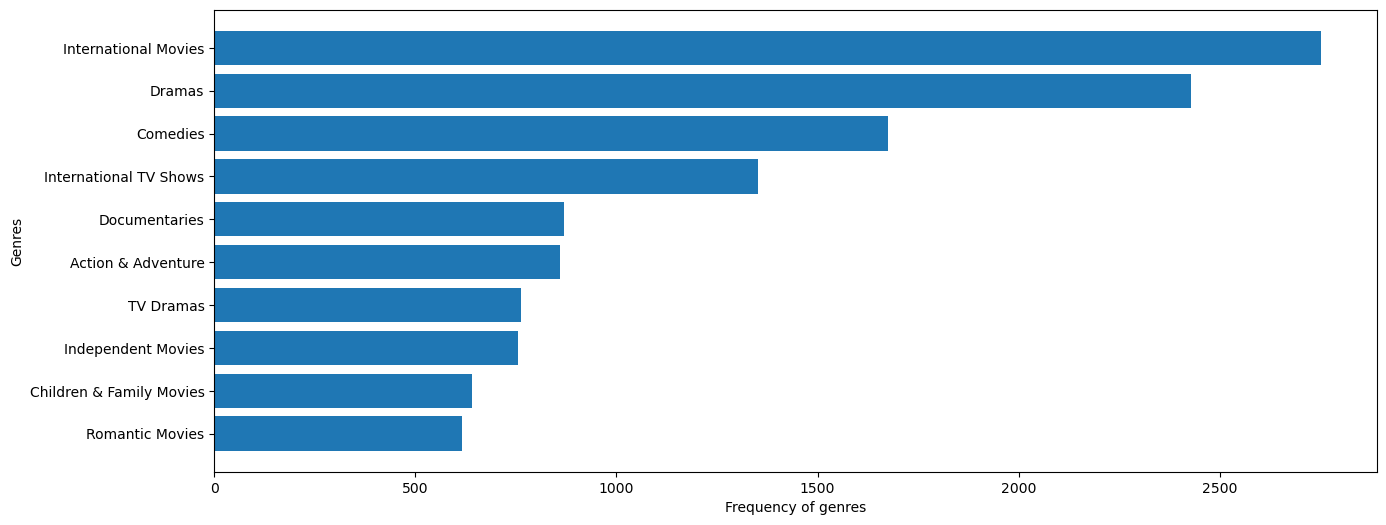

In [ ]:
# ploting top 10 geners for both movies and tv shows combined.
df_genre = df_final.groupby(['genre']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index()[:10]
plt.figure(figsize=(15,6))
plt.barh(df_genre[::-1]['genre'],df_genre[::-1]['title'])
plt.xlabel('Frequency of genres')
plt.ylabel('Genres')
plt.show()

Top 10 categories of genres.

### Insights- There are 42 different categories of genre available and Mostly the movies/series produced/available on netflix platform are of 'International movies','comedy' and 'dramas' category. And the least touched categories are TV shows and Stand-up shows.

In [ ]:
''' Now lets see the percentage of movies distrubution on the basis of types. '''

' Now lets see the percentage of movies distrubution on the basis of types. '

In [ ]:
df_res = df_final.groupby(['type']).agg({'title':'nunique'}).reset_index()
df_res

,type,title
0,Movie,6131
1,TV Show,2676


<Axes: xlabel='type', ylabel='percentage'>

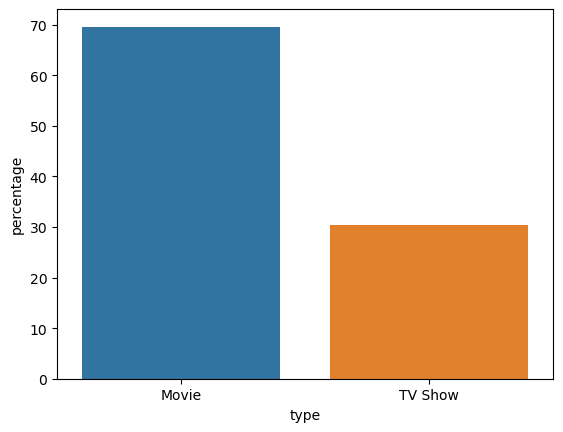

In [ ]:
# percentage of movies and series produced.
df_res['percentage'] = df_res['title']/df_res['title'].sum()*100             # Plotting by percentage.
sns.barplot(x=df_res['type'] ,y= df_res['percentage'])

### Insights- So we can see the contribution of 'Movie' type content is about almost 70%.

In [ ]:
''' Now lets see the count of movies from each country. '''

' Now lets see the count of movies from each country. '

In [ ]:
# Top 10 countries by number of movies/series.
df_topcountry = df_final.groupby(['country']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).head(10).reset_index()
df_topcountry

,country,title
0,United States,4157
1,India,1160
2,United Kingdom,849
3,Japan,556
4,Canada,473
5,France,414
6,South Korea,316
7,Spain,245
8,Germany,231
9,Mexico,208


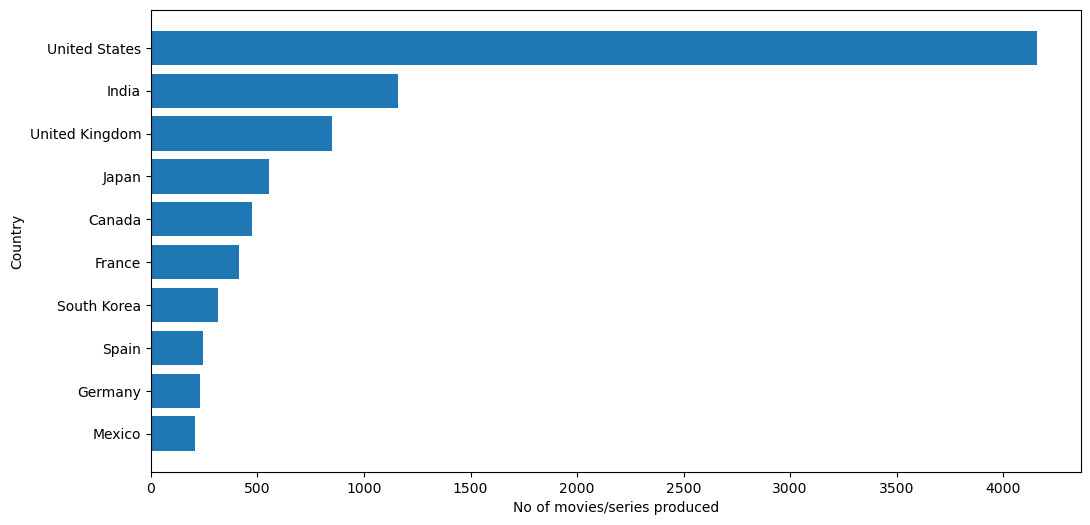

In [ ]:
# ploting top 10 countries by content produced.
plt.figure(figsize=(12,6))
plt.barh(df_topcountry[::-1]['country'],df_topcountry[::-1]['title'])
plt.xlabel('No of movies/series produced')
plt.ylabel('Country')
plt.show()

### Insights- Maximum number of movies are produced in USA followed by India and UK.

In [ ]:
''' Now we can see number of movies in which each actor was casted. '''

' Now we can see number of movies in which each actor was casted. '

In [ ]:
# top 15 actors in netflix in both movies and tv shows combined.
df_topact = df_final.groupby(['actors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False).head(15).reset_index()
df_topact

,actors,title
0,David Attenborough,448
1,Takahiro Sakurai,131
2,Paul Hollywood,94
3,Anupam Kher,63
4,Raúl Méndez,56
5,Rory Kinnear,48
6,Bryce Papenbrook,48
7,Aenie Wong,42
8,Shah Rukh Khan,35
9,John Paul Tremblay,34


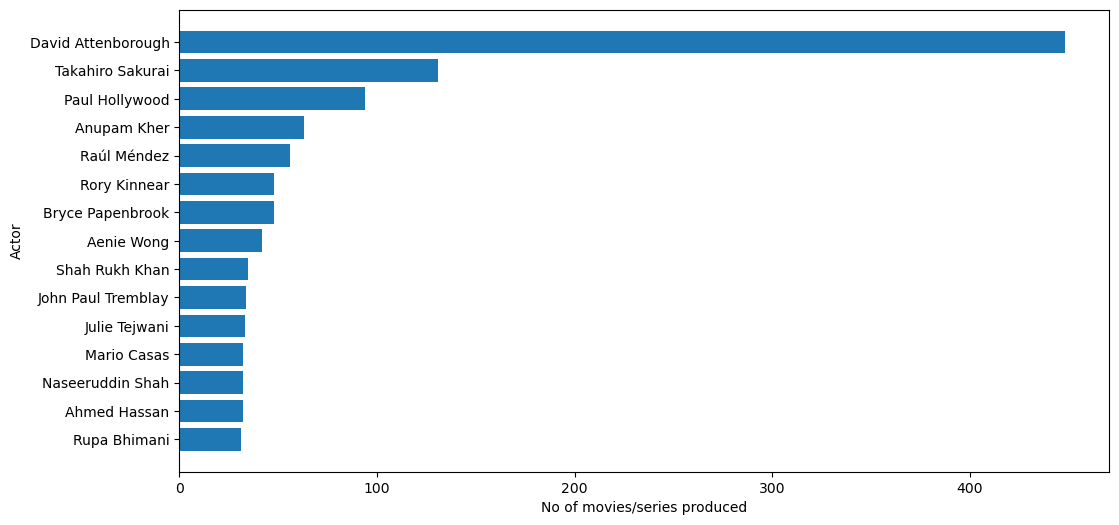

In [ ]:
# ploting top 15 actors who were casted in maximum movies or tv shows combined.
plt.figure(figsize=(12,6))
plt.barh(df_topact[::-1]['actors'],df_topact[::-1]['title'])
plt.xlabel('No of movies/series produced')
plt.ylabel('Actor')
plt.show()

### ***Insights***- David Attenborough is the actor who has worked in maximum number of Movies or TV Shows. Anupam Kher, Shar rukh khan, Julie Tejwani, Naseeruddin Shah and Rupa Bhimani are the Indian actors in top 15 list.

In [ ]:
# Top 10 directors in netflix in both movies and tv shows combined.
df_topdir = df_final.groupby(['directors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False).head(10).reset_index()
df_topdir

,directors,title
0,Hiroyuki Seshita,1275
1,Houda Benyamina,689
2,Thomas Astruc,554
3,Richard Phelan,487
4,Alejandro Lozano,386
5,Hsu Fu-chun,346
6,Alastair Fothergill,308
7,Andy Devonshire,232
8,Noam Murro,202
9,Manolo Caro,162


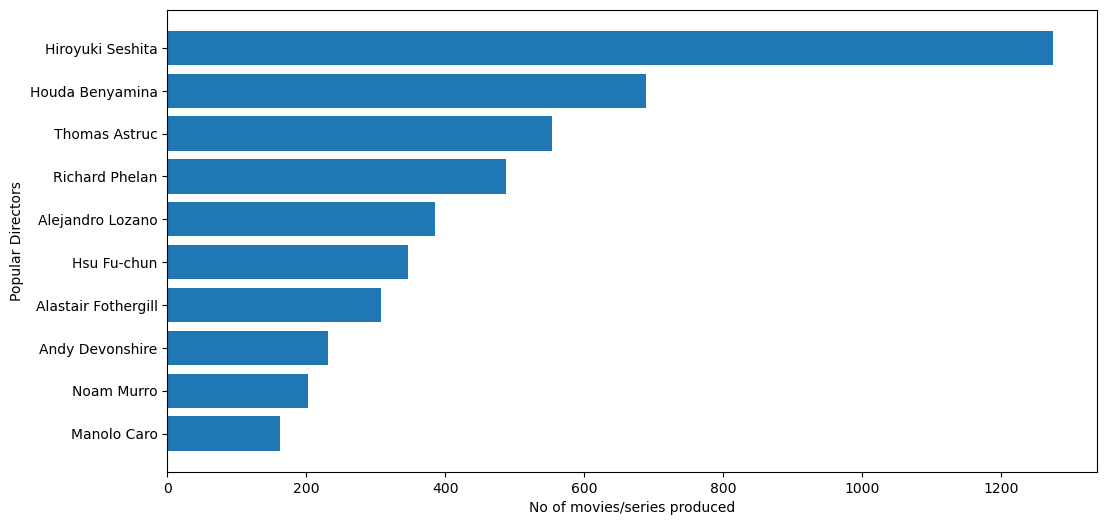

In [ ]:
# ploting top 10 directors who produced maximum content.
plt.figure(figsize=(12,6))
plt.barh(df_topdir[::-1]['directors'],df_topdir[::-1]['title'])
plt.xlabel('No of movies/series produced')
plt.ylabel('Popular Directors')
plt.show()

### ***Insights***- Maximum number of movies/series are produced by director named Hiroyuki Seshita.

In [ ]:
# Number of movies/tv shows released per year.
df_year = df_final.groupby(['year']).agg({'title':'nunique'}).reset_index()
df_year

,year,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


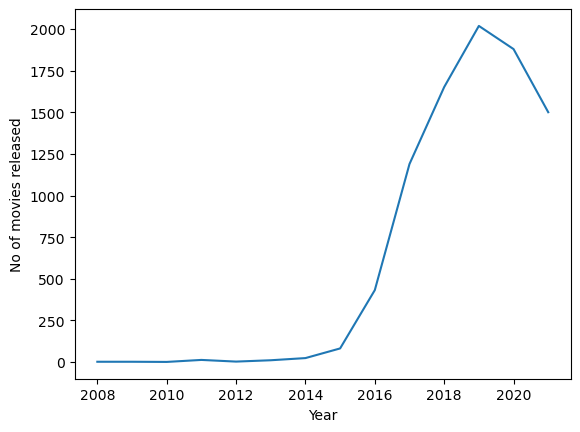

In [ ]:
# ploting top years by content produced.
sns.lineplot(x=df_year['year'], y=df_year['title'])
plt.ylabel('No of movies released')
plt.xlabel('Year')
plt.show()

### ***Insights***- Number of movies/Shows produced were growing from 2015 to 2019 constantly and rapidly. Maximum number of movies were produced in the year 2019. But after the year 2019, there has been a fall in the movies produced may be probably due to the outburst of COVID19 by the end of the year 2019.

In [ ]:
# Weekly number of movies and series released.
df_week = df_final.groupby(['week_num']).agg({'title':'nunique'}).reset_index()
df_week.head()

,week_num,title
0,1,372
1,2,108
2,3,113
3,4,88
4,5,208


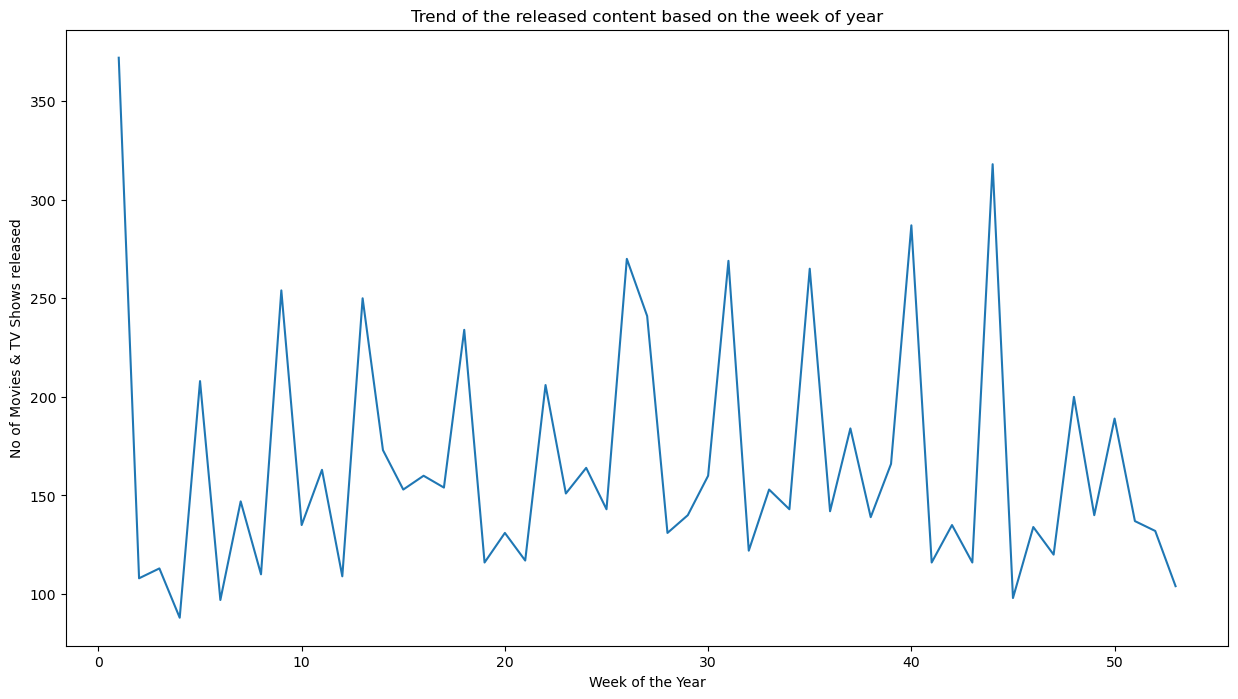

In [ ]:
# ploting number of movies and tv shows released per week.
plt.figure(figsize=(15,8))
sns.lineplot(x=df_week['week_num'], y=df_week['title'])
plt.ylabel('No of Movies & TV Shows released')
plt.title('Trend of the released content based on the week of year')
plt.xlabel('Week of the Year')
plt.show()

### Insights- Regular spikes and dips indicate that the content is mostly released during certain weeks and then there is a gap for some time i.e. the release of the content is not very uniform or smooth.

In [ ]:
# month wise number of Movies and shows released.
df_month = df_final.groupby(['month']).agg({'title':'nunique'}).reset_index()
df_month

,month,title
0,1,738
1,2,563
2,3,742
3,4,765
4,5,632
5,6,728
6,7,831
7,8,756
8,9,773
9,10,760


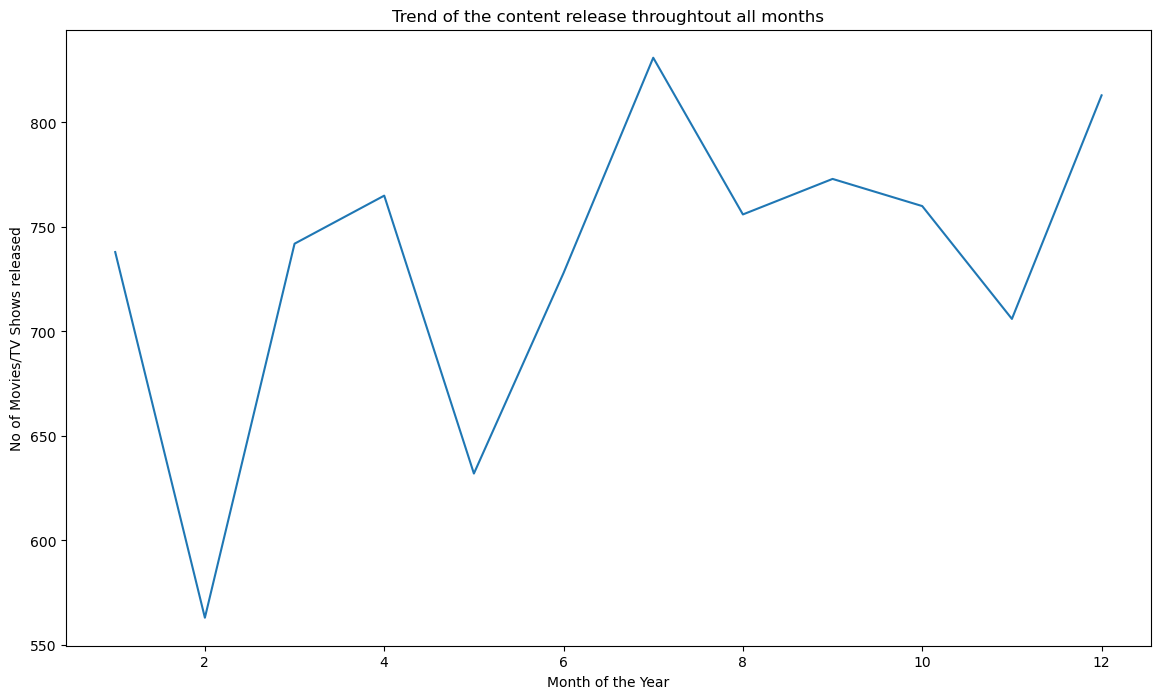

In [ ]:
# ploting number of movies and tv shows released per month.
plt.figure(figsize=(14,8))
sns.lineplot(x=df_month['month'], y=df_month['title'])
plt.ylabel('No of Movies/TV Shows released')
plt.title('Trend of the content release throughtout all months')
plt.xlabel('Month of the Year')
plt.show()

### Insights- Most of the content is added in first and last month of the year.

In [ ]:
df_final.head()

,title,directors,actors,genre,country,type,release_year,date_added,rating,duration,week_num,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,Documentaries,United States,Movie,2020,2021-09-25,PG-13,90,38,9,2021
1,Blood & Water,Hiroyuki Seshita,Ama Qamata,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
2,Blood & Water,Houda Benyamina,Ama Qamata,TV Dramas,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
3,Blood & Water,Rob Seidenglanz,Ama Qamata,TV Mysteries,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
4,Blood & Water,Hiroyuki Seshita,Khosi Ngema,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021


--------------------------------------------------------------

### Spread of the duration.

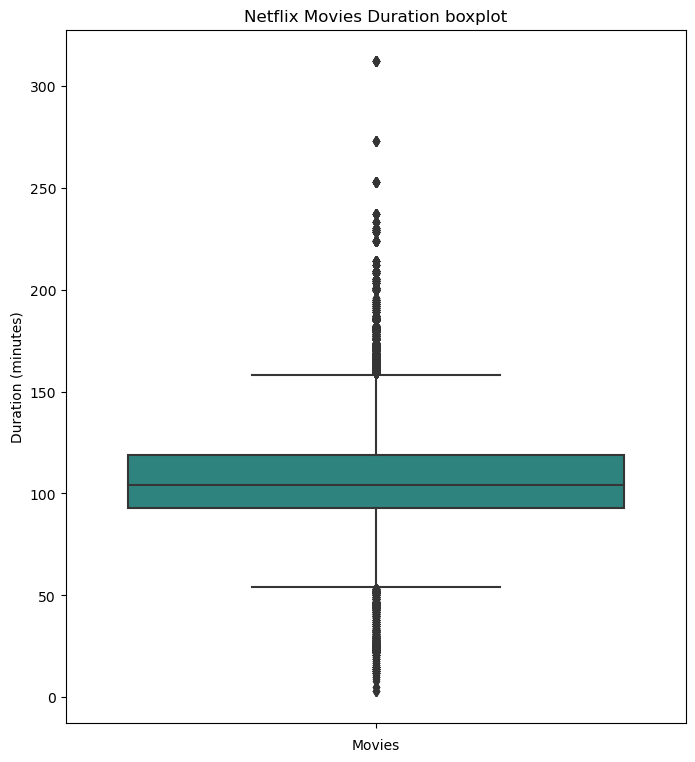

In [ ]:
# Considering the duration of movies to get the outliers in the duration.
plt.figure(figsize=(8, 9))
df_movies = df_final[df_final['type']=='Movie']
# Create a boxplot for the 'duration' column
sns.boxplot(y='duration', data=df_movies, palette='viridis')

# labels and title
plt.xlabel('Movies')
plt.ylabel('Duration (minutes)')
plt.title('Netflix Movies Duration boxplot')

# Show the plot
plt.show()


In [ ]:
df_movies['duration'].describe()

count    145843.00000
mean        106.85579
std          24.69672
min           3.00000
25%          93.00000
50%         104.00000
75%         119.00000
max         312.00000
Name: duration, dtype: float64

### Insights- The range of duration of movies is from minimum of 3 minutes to maximum of 312 minutes both of which are outliers in our case. Outliers in the movies duration boxpolt can be seen here. Median is at 104 minutes i.e. 2nd quartile. 1st quartile is at 93 minutes and 3rd quartile is at 119 minutes. So Interquartile range is 119-93 = 26.

## 3. Some India specific analysis.

In [ ]:
''' Now fetching the top 10 actors and directors from India'''

' Now fetching the top 10 actors and directors from India'

In [ ]:
# Top 10 actors from india.
df_ind = df_final[df_final['country']=='India']
df_indact = df_ind.groupby(['actors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False).head(10).reset_index()
df_indact

,actors,title
0,Anupam Kher,60
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Rupa Bhimani,31
5,Akshay Kumar,29
6,Rajesh Kava,29
7,Om Puri,29
8,Paresh Rawal,28
9,Amitabh Bachchan,28


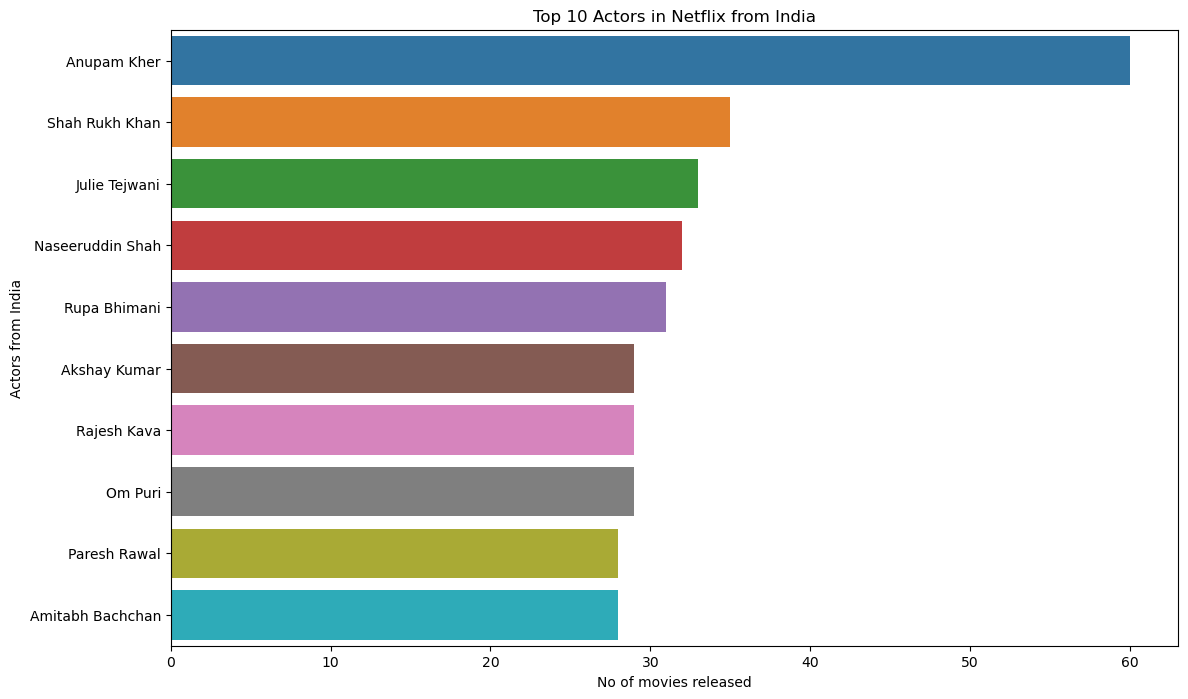

In [ ]:
# ploting top 10 actors in nexflix from india.
plt.figure(figsize=(13,8))
sns.barplot(y=df_indact['actors'], x=df_indact['title'])
plt.ylabel('Actors from India')
plt.title('Top 10 Actors in Netflix from India')
plt.xlabel('No of movies released')
plt.show()

Top 10 actors from india

In [ ]:
# Top 10 directors from india.
df_ind = df_final[df_final['country']=='India']
df_inddirc = df_ind.groupby(['directors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False).head(10).reset_index()
df_inddirc

,directors,title
0,Hiroyuki Seshita,51
1,Rajiv Chilaka,30
2,Richard Phelan,21
3,Suhas Kadav,21
4,Houda Benyamina,20
5,Anurag Kashyap,14
6,Thomas Astruc,13
7,Prakash Satam,12
8,David Dhawan,12
9,Dibakar Banerjee,11


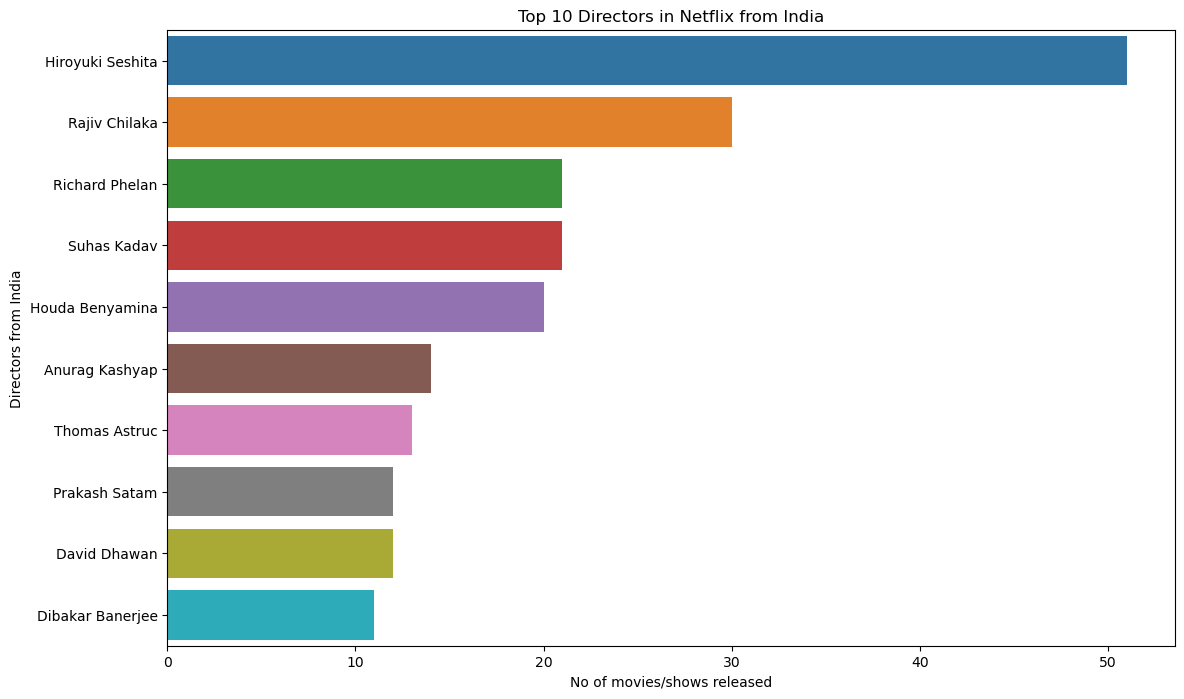

In [ ]:
# ploting top 10 directors in nexflix from india.
plt.figure(figsize=(13,8))
sns.barplot(y=df_inddirc['directors'], x=df_inddirc['title'])
plt.ylabel('Directors from India')
plt.title('Top 10 Directors in Netflix from India')
plt.xlabel('No of movies/shows released')
plt.show()

Top 10 directors of netflix from india

### Insights- Hiroyuki Seshita and Rajiv Chilaka are the 2 most famous directors in india and Anupam Kher while Shah Rukh Khan are the 2 most popular actors from india.

In [ ]:
# top 10 genre in india.
df_ind = df_final[df_final['country']=='India']
df_indgen = df_ind.groupby(['genre']).agg({'title':'nunique'}).sort_values(by='title', ascending = False).head(10).reset_index()
df_indgen

,genre,title
0,International Movies,901
1,Dramas,687
2,Comedies,347
3,Independent Movies,170
4,Action & Adventure,148
5,Romantic Movies,122
6,Music & Musicals,105
7,Thrillers,103
8,Children & Family Movies,81
9,International TV Shows,73


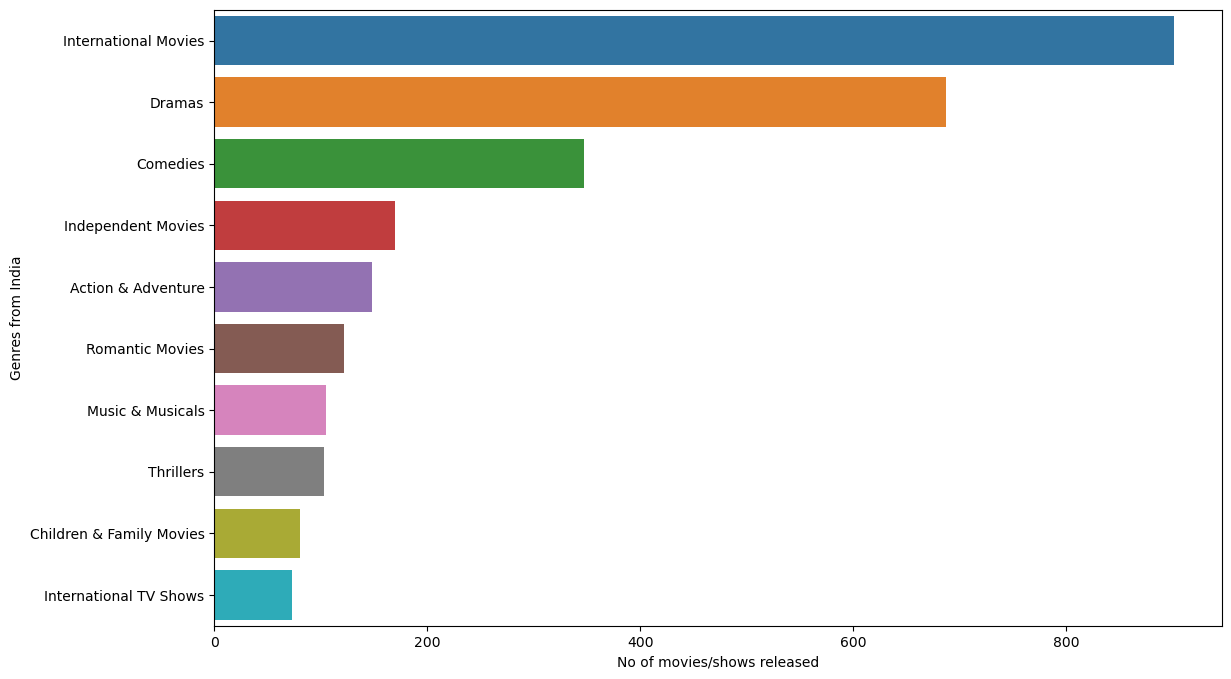

In [ ]:
# ploting top 10 genres in nexflix from india.
plt.figure(figsize=(13,8))
sns.barplot(y=df_indgen['genre'], x=df_indgen['title'])
plt.ylabel('Genres from India')
plt.xlabel('No of movies/shows released')
plt.show()

### Insights- Most of the content available for india is of International movies and Drama category.

In [ ]:
# top 10 rating in india.
df_ind = df_final[df_final['country']=='India']
df_indrat = df_ind.groupby(['rating']).agg({'title':'nunique'}).sort_values(by='title', ascending = False).head(10).reset_index()
df_indrat

,rating,title
0,TV-14,602
1,TV-MA,278
2,TV-PG,151
3,TV-Y7,70
4,TV-Y,17
5,PG-13,11
6,TV-G,10
7,NR,7
8,PG,7
9,R,5


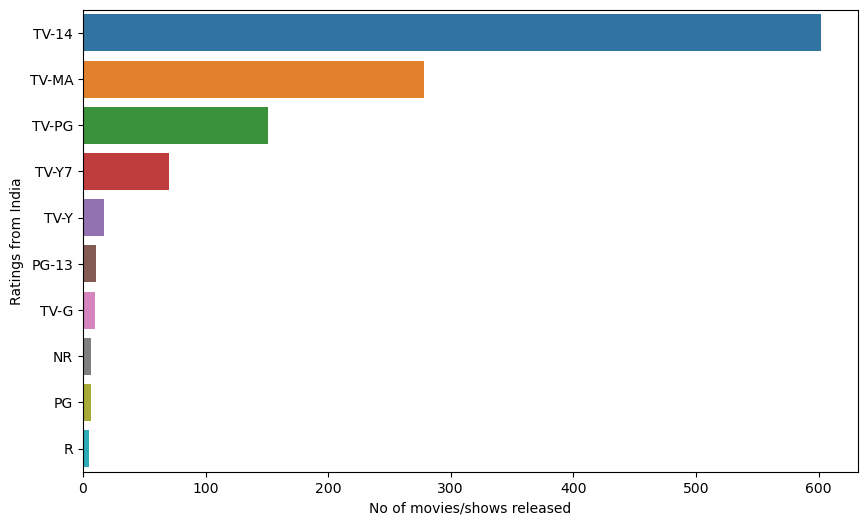

In [ ]:
# ploting top 10 ratings in nexflix from india.
plt.figure(figsize=(10,6))
sns.barplot(y=df_indrat['rating'], x=df_indrat['title'])
plt.ylabel('Ratings from India')
plt.xlabel('No of movies/shows released')
plt.show()

### Most of the content in india is for the audience of 14+ and mature.

---------------------------------------------------------

---------------------------------------------------------------

## 4. Now lets analyze the Movies and TV shows and try to compare them side-by-side.

In [ ]:
df_final.head()

,title,directors,actors,genre,country,type,release_year,date_added,rating,duration,week_num,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,Documentaries,United States,Movie,2020,2021-09-25,PG-13,90,38,9,2021
1,Blood & Water,Hiroyuki Seshita,Ama Qamata,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
2,Blood & Water,Houda Benyamina,Ama Qamata,TV Dramas,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
3,Blood & Water,Rob Seidenglanz,Ama Qamata,TV Mysteries,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021
4,Blood & Water,Hiroyuki Seshita,Khosi Ngema,International TV Shows,South Africa,TV Show,2021,2021-09-24,TV-MA,0,38,9,2021


In [ ]:
# Data of tv shows
df_tvshow = df_final[df_final['type']=='TV Show']
# data of movies
df_movies = df_final[df_final['type']=='Movie']

In [ ]:
# number of movies made of each rating.
df_ratg = df_movies.groupby(['rating']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)
# number of movies made of each rating.
df_ratgt = df_tvshow.groupby(['rating']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index()

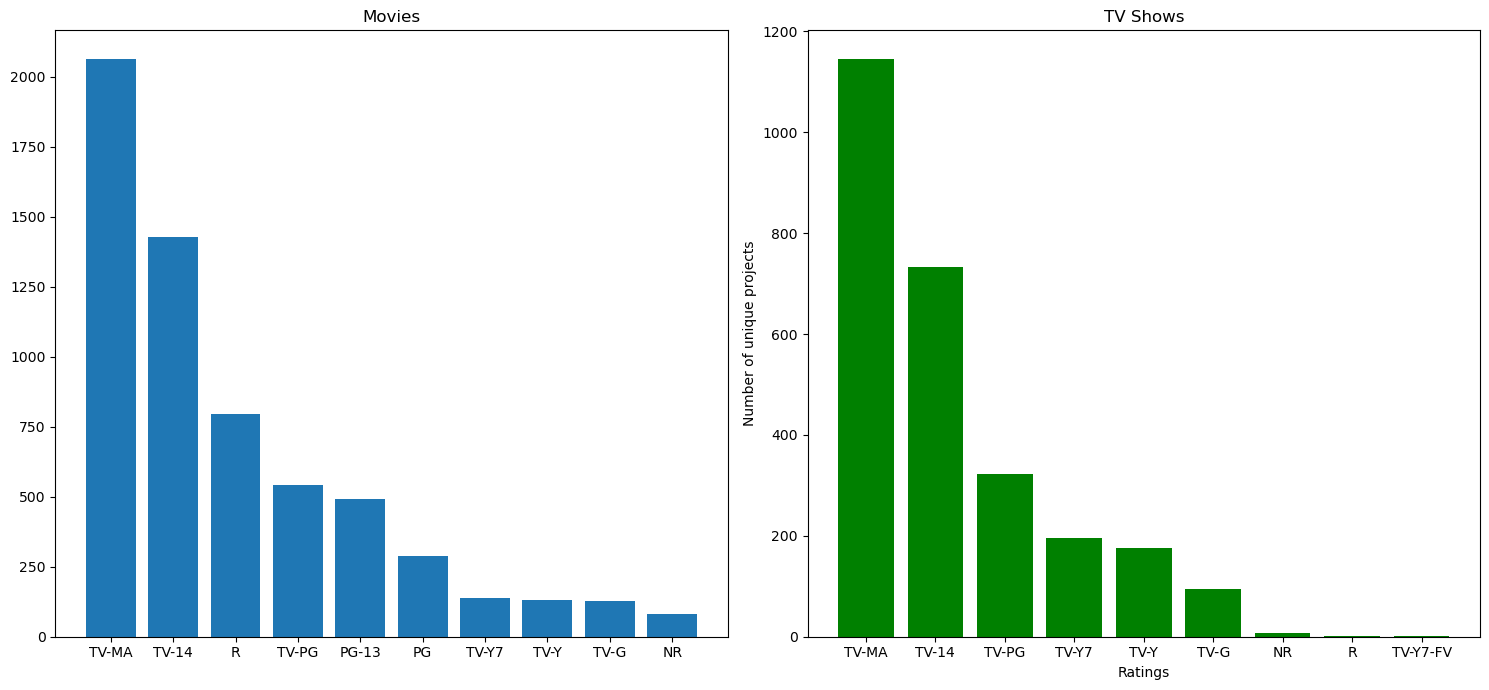

In [ ]:
# Comparison of amount of content released in both movie and tv shows on the basis of ratings.
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Plot for Movies
axes[0].bar(df_ratg[::]['rating'], df_ratg[::]['title'] )
axes[0].set_title('Movies')
plt.xlabel('Ratings')
plt.ylabel('Number of unique projects')
# Plot for TV Shows
axes[1].bar(df_ratgt[::]['rating'],df_ratgt[::]['title'],color='green')
axes[1].set_title('TV Shows')
plt.xlabel('Ratings')
plt.tight_layout()

### Insights- Maximum Movies and TV Shows produced are of mostly TV-MA and TV-14 rating i.e. for 14+ and Mature audience.

In [ ]:
# number of movies made of each genre.
df_mgnr = df_movies.groupby(['genre']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)
# number of TV Shows made of each genre.
df_tvgnr = df_tvshow.groupby(['genre']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)

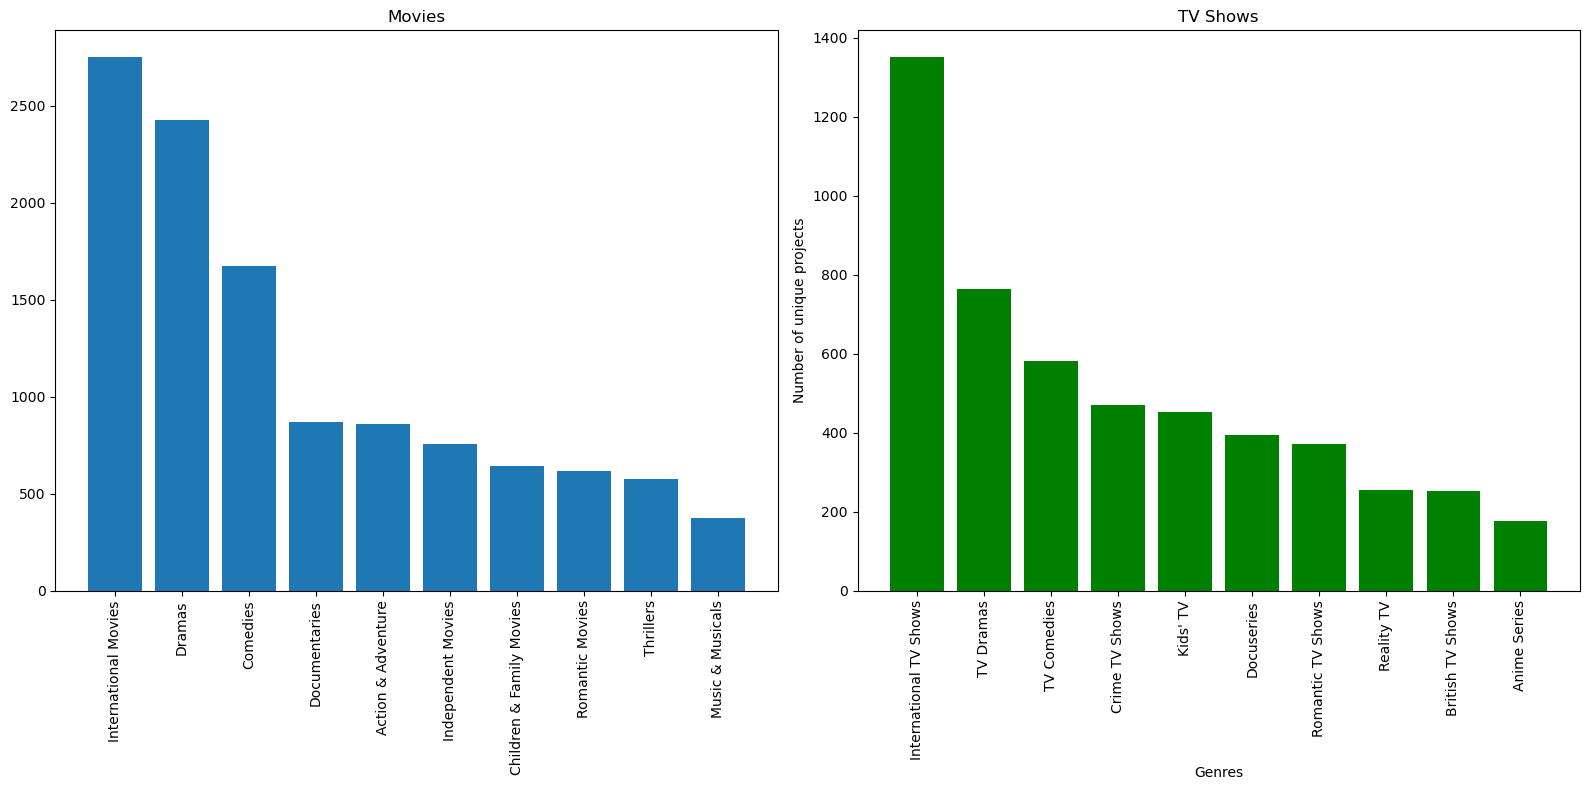

In [ ]:
# Comparison of number of movies released in both movie and tv shows in terms of genre.
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# Plot for Movies
axes[0].bar(df_mgnr[::]['genre'], df_mgnr[::]['title'] )
axes[0].set_title('Movies')
axes[0].set_xticks(df_mgnr[::]['genre'])
axes[0].set_xticklabels(df_mgnr[::]['genre'], rotation=90)    # Rotate x-axis ticks
plt.xlabel('Genres')
plt.ylabel('Number of unique projects')
# Plot for TV Shows
axes[1].bar(df_tvgnr[::]['genre'],df_tvgnr[::]['title'],color='green')
axes[1].set_title('TV Shows')
axes[1].set_xticks(df_tvgnr[::]['genre'])
plt.xlabel('Genres')
axes[1].set_xticklabels(df_tvgnr[::]['genre'], rotation=90)  # Rotate x-axis ticks
plt.tight_layout()
plt.show()

### Insights- Most of the Movies produced are of 'International Movies', 'Dramas' and 'Comedy' genre and for TV Shows it is 'Int TV Shows','TV Dramas' and 'TV comedy'. So mostly Drama, Comedy and International type genres are the top 3 famous genres.

In [ ]:
# directors who are producing maximum movies.
df_dirtm = df_movies.groupby(['directors']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)
# directors who are producing maximum TV Shows.
df_dirtv = df_tvshow.groupby(['directors']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)

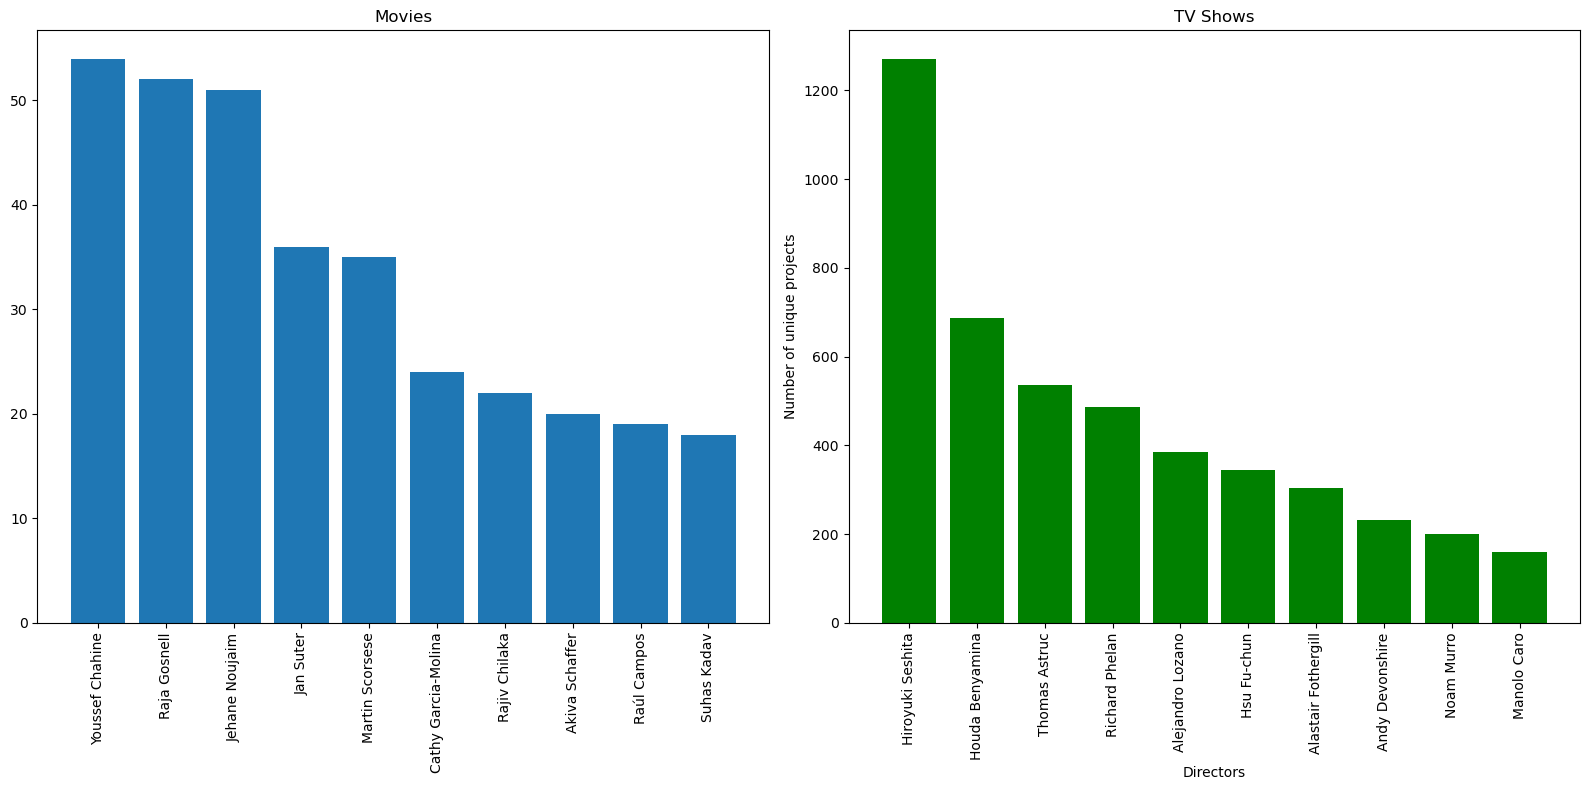

In [ ]:
# Getting top 10 directors for movies and tv shows and number of projects they produced.
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# Plot for Movies
axes[0].bar(df_dirtm[::]['directors'], df_dirtm[::]['title'] )
axes[0].set_title('Movies')
axes[0].set_xticks(df_dirtm[::]['directors'])
axes[0].set_xticklabels(df_dirtm[::]['directors'], rotation=90)    # Rotate x-axis ticks
plt.xlabel('Directors')
plt.ylabel('Number of unique projects')
# Plot for TV Shows
axes[1].bar(df_dirtv[::]['directors'],df_dirtv[::]['title'],color='green')
axes[1].set_title('TV Shows')
axes[1].set_xticks(df_dirtv[::]['directors'])
axes[1].set_xticklabels(df_dirtv[::]['directors'], rotation=90)  # Rotate x-axis ticks
plt.tight_layout()
plt.show()

### Insights- No common director in top 10 for both Movies and TV Shows.

In [ ]:
# actors who are producing maximum movies.
df_actm = df_movies.groupby(['actors']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)
# actors who are producing maximum tv shows.
df_actv = df_tvshow.groupby(['actors']).agg({'title':'nunique'}).sort_values(by='title', ascending=False).reset_index().head(10)

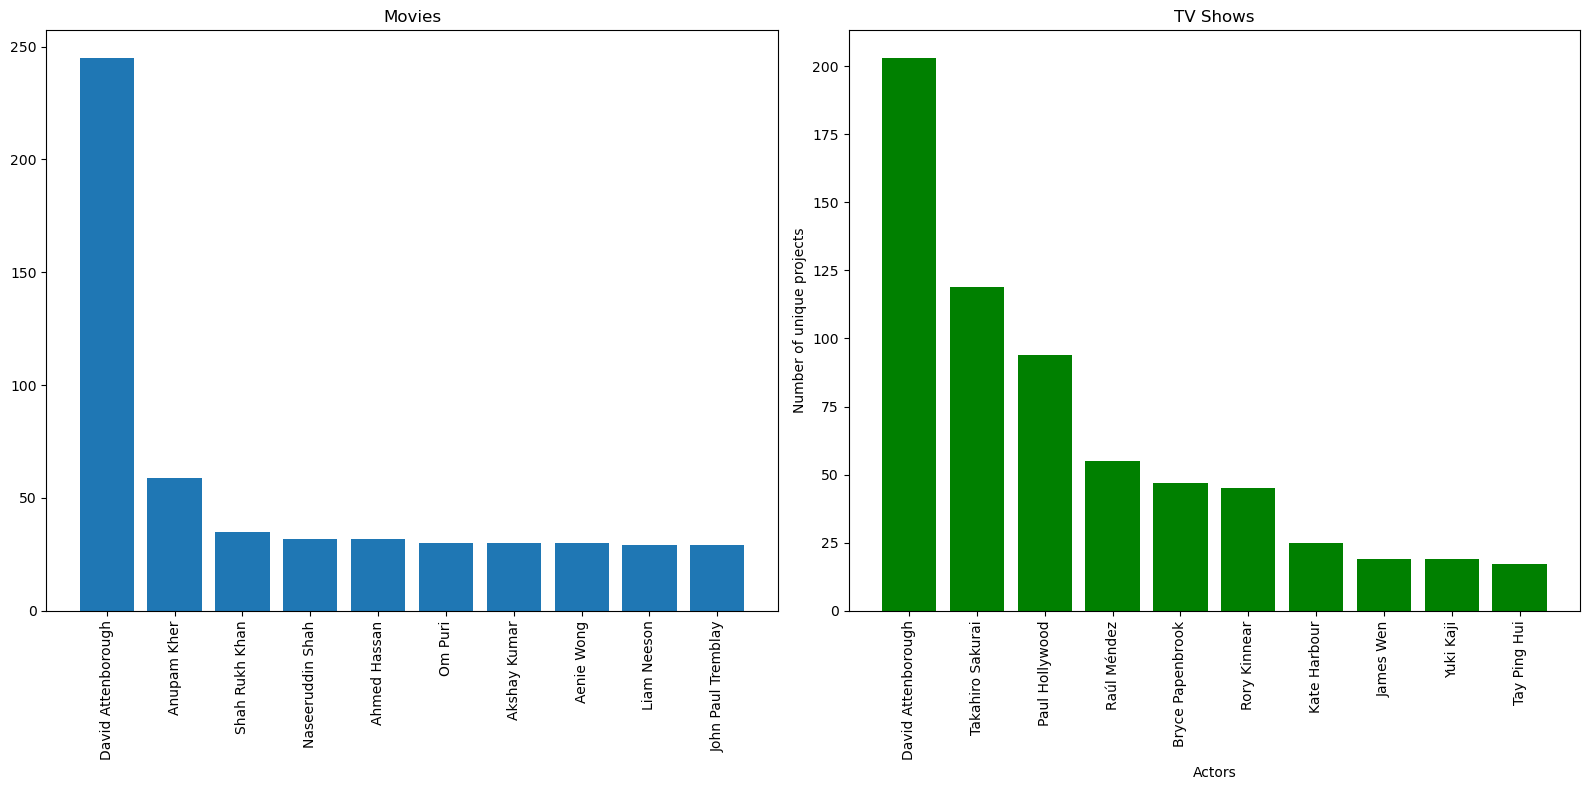

In [ ]:
# Getting top 10 actors for movies and tv shows and number of projects they were casted in.
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# Plot for Movies
axes[0].bar(df_actm[::]['actors'], df_actm[::]['title'] )
axes[0].set_title('Movies')
axes[0].set_xticks(df_actm[::]['actors'])
axes[0].set_xticklabels(df_actm[::]['actors'], rotation=90)    # Rotate x-axis ticks
plt.xlabel('Actors')
plt.ylabel('Number of unique projects')
# Plot for TV Shows
axes[1].bar(df_actv[::]['actors'],df_actv[::]['title'],color='green')
axes[1].set_title('TV Shows')
axes[1].set_xticks(df_actv[::]['actors'])
axes[1].set_xticklabels(df_actv[::]['actors'], rotation=90)  # Rotate x-axis ticks
plt.tight_layout()
plt.show()

### Insights- David Attenborough is the person who has worked in maximum number of movies and also in maximum TV shows.

In [ ]:
'''Now comparing the num of movies and series released per year.'''

'Now comparing the num of movies and series released per year.'

In [ ]:
# Number of movies released per year.
df_yearm = df_movies.groupby(['year']).agg({'title':'nunique'}).reset_index()
# Number of TV Shows released per year.
df_yeart = df_tvshow.groupby(['year']).agg({'title':'nunique'}).reset_index()

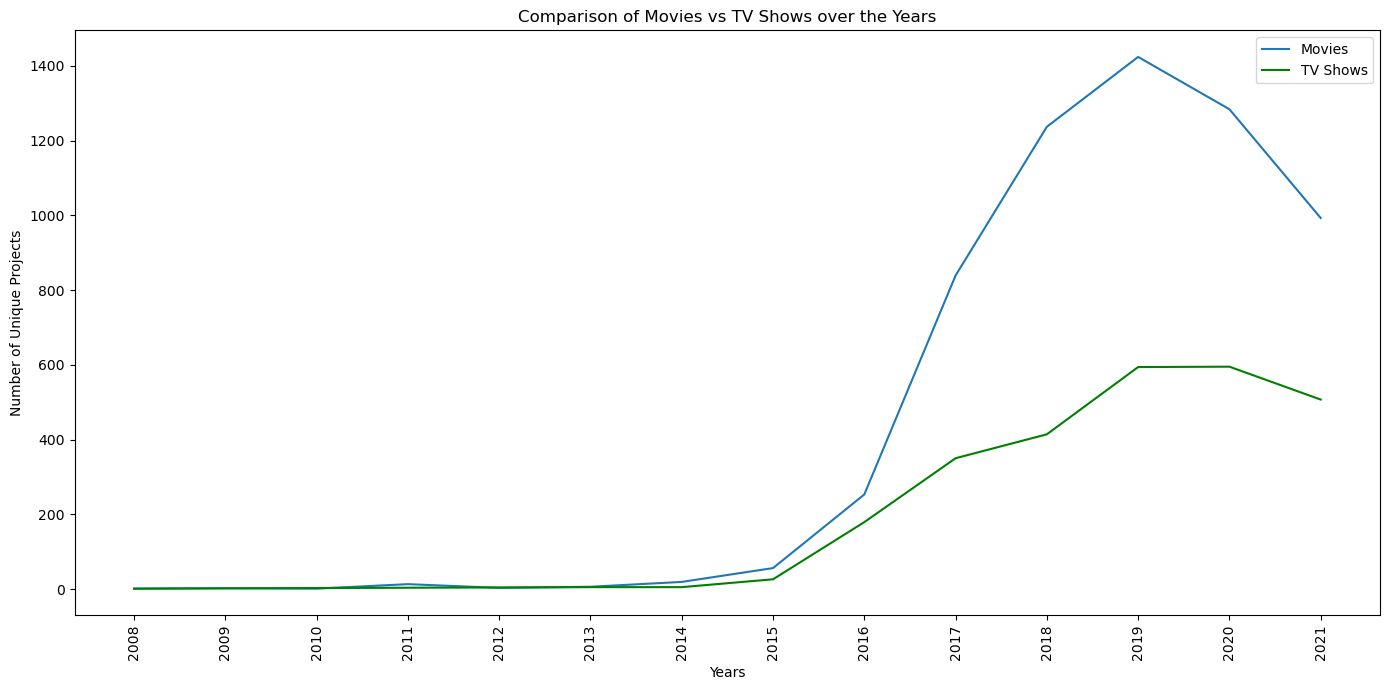

In [ ]:
# Taking df_yearm and df_yeart are your DataFrames for Movies and TV Shows, respectively
plt.figure(figsize=(14, 7))

# Plot for Movies
plt.plot(df_yearm['year'], df_yearm['title'], label='Movies')

# Plot for TV Shows
plt.plot(df_yeart['year'], df_yeart['title'], label='TV Shows', color='green')

# labels and title
plt.xlabel('Years')
plt.ylabel('Number of Unique Projects')
plt.title('Comparison of Movies vs TV Shows over the Years')

# x-axis ticks and labels
plt.xticks(df_yearm['year'], rotation=90)

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Insights- Clearly movies released are significantly more that the number of TV Shows released in recent years upto 2019. And then after there is a drop may be due to the COVID 19 pandamic outbreak.

In [ ]:
# Month wise number of Movies released.
df_monthm = df_movies.groupby(['month']).agg({'title':'nunique'}).reset_index()
# Month wise number of TV Shows released.
df_montht = df_tvshow.groupby(['month']).agg({'title':'nunique'}).reset_index()

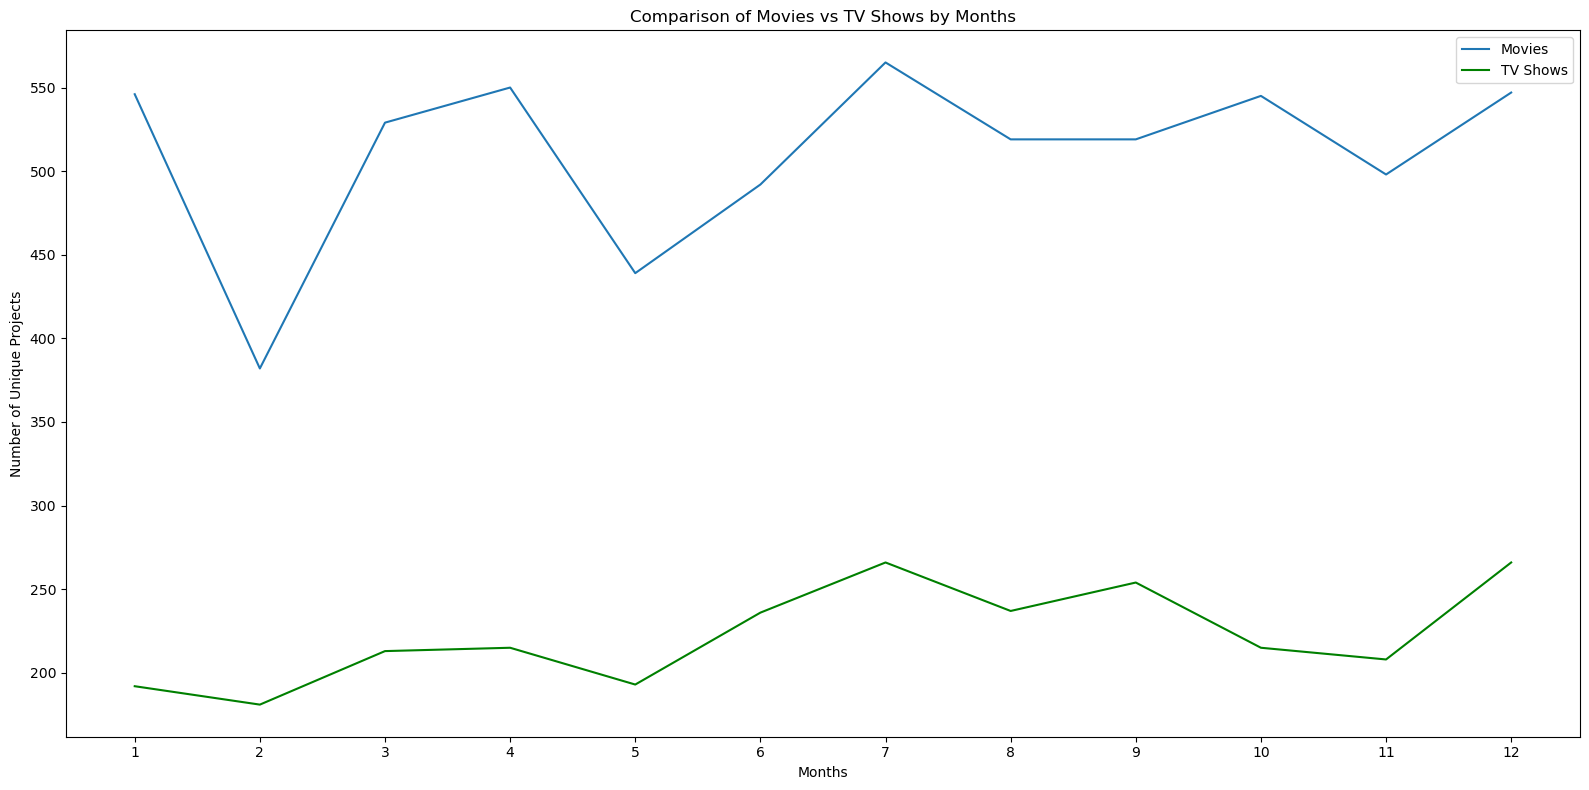

In [ ]:
# Assuming df_monthm and df_montht are your DataFrames for Movies and TV Shows, respectively
plt.figure(figsize=(16, 8))

# Plot for Movies
plt.plot(df_monthm['month'], df_monthm['title'], label='Movies')

# Plot for TV Shows
plt.plot(df_montht['month'], df_montht['title'], label='TV Shows', color='green')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Number of Unique Projects')
plt.title('Comparison of Movies vs TV Shows by Months')

# Set x-axis ticks and labels
plt.xticks(df_monthm['month'])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Insights- Clearly the number of movies released per month is much greater that the number of TV Shows released.

### Now to get the best time to release a new tv show or a movie we need heat maps.

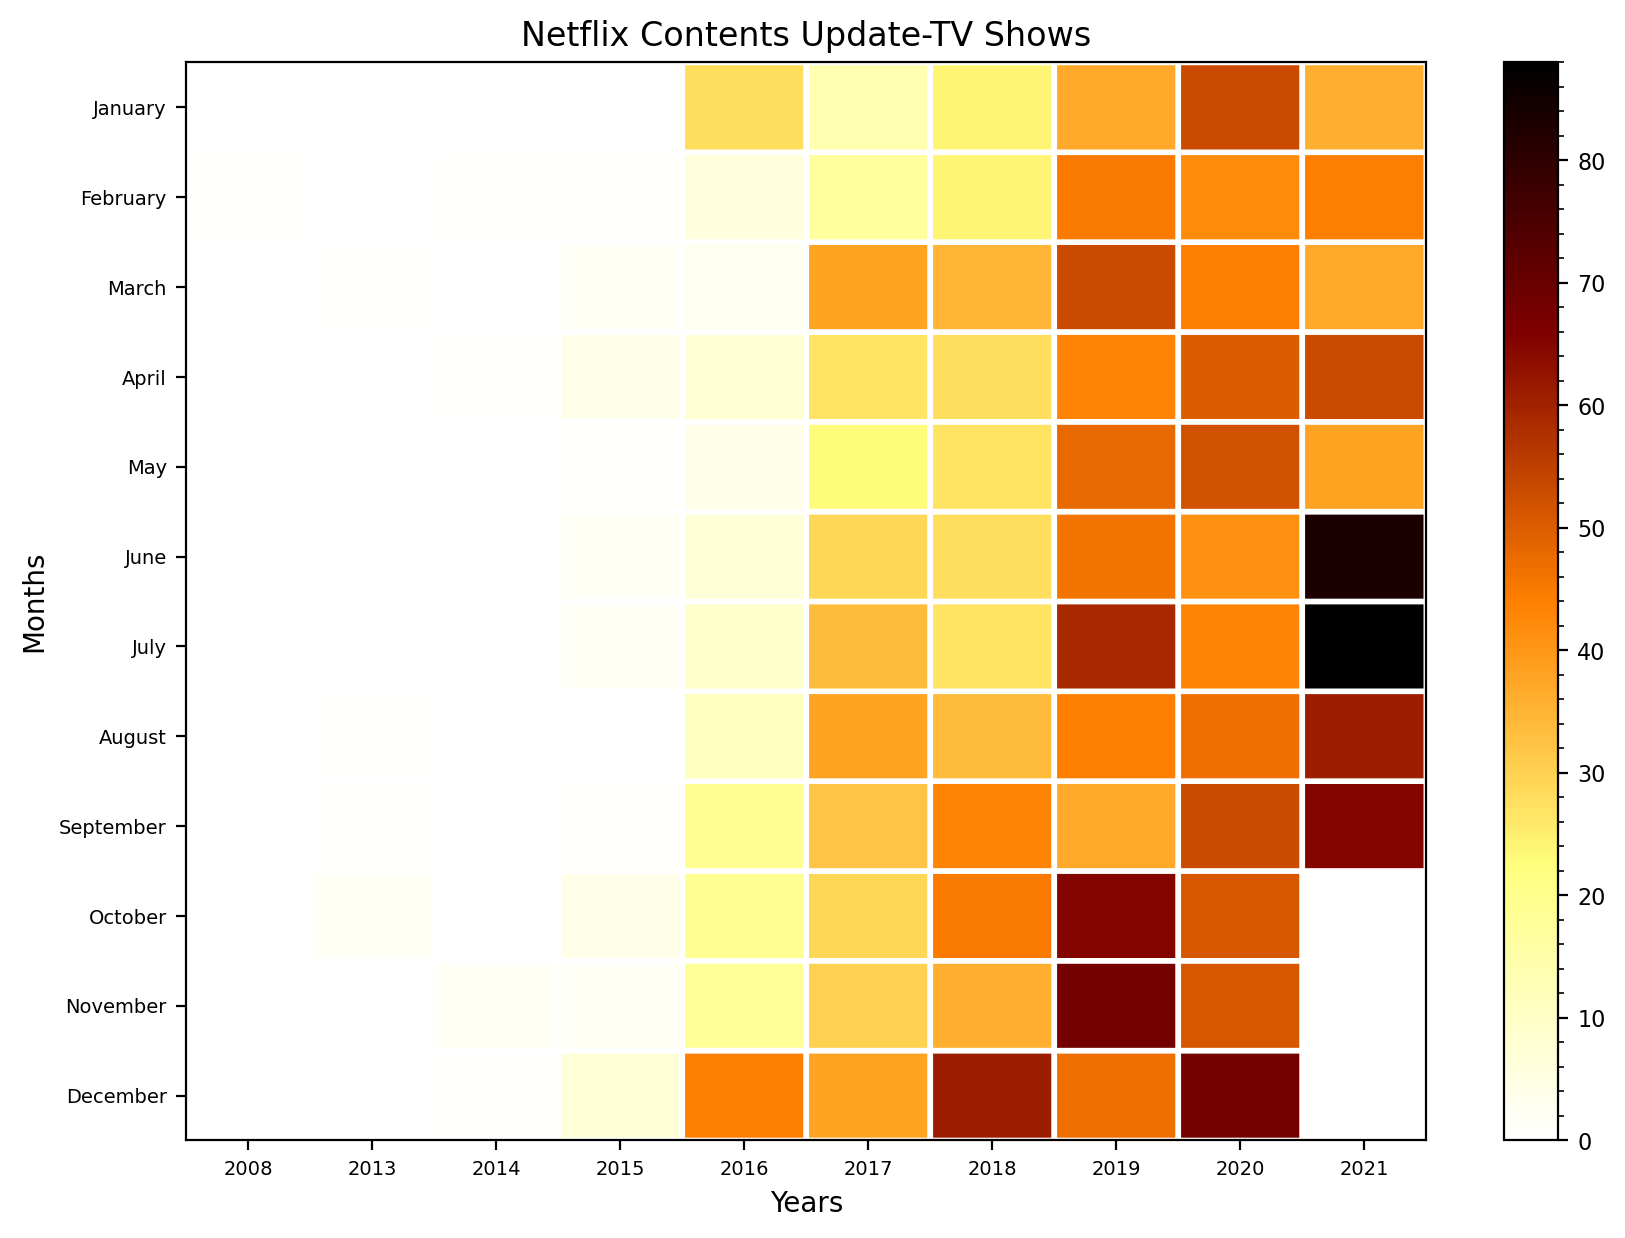

In [ ]:
# Presenting a heat map for TV Shows to get the best time to release a new TV Show on netflix.
nt_shows=df[df['type']=='TV Show']

netflix_date = nt_shows[['date_added']].dropna()      # Since there were only 10 nulls in date_added so we can remove nulls.
netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.strftime('%B')  # Convert month to full month name

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_tvdd = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)


plt.pcolor(df_tvdd, cmap='afmhot_r', edgecolors='white', linewidths=2)     # heatmap
plt.xticks(np.arange(0.5, len(df_tvdd.columns), 1), df_tvdd.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df_tvdd.index), 1), df_tvdd.index, fontsize=7)
plt.xlabel('Years')
plt.ylabel('Months')
plt.title('Netflix Contents Update-TV Shows')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### Insights- From the above heatmap for TV Shows we can say that in the recent years, since there are less release of the new content during the first quater of the year i.e. January, Feb and March. So if any producer needs to release a new content on the netflix, then he could release them during the first quarter of the year as there will be least competition during that time.

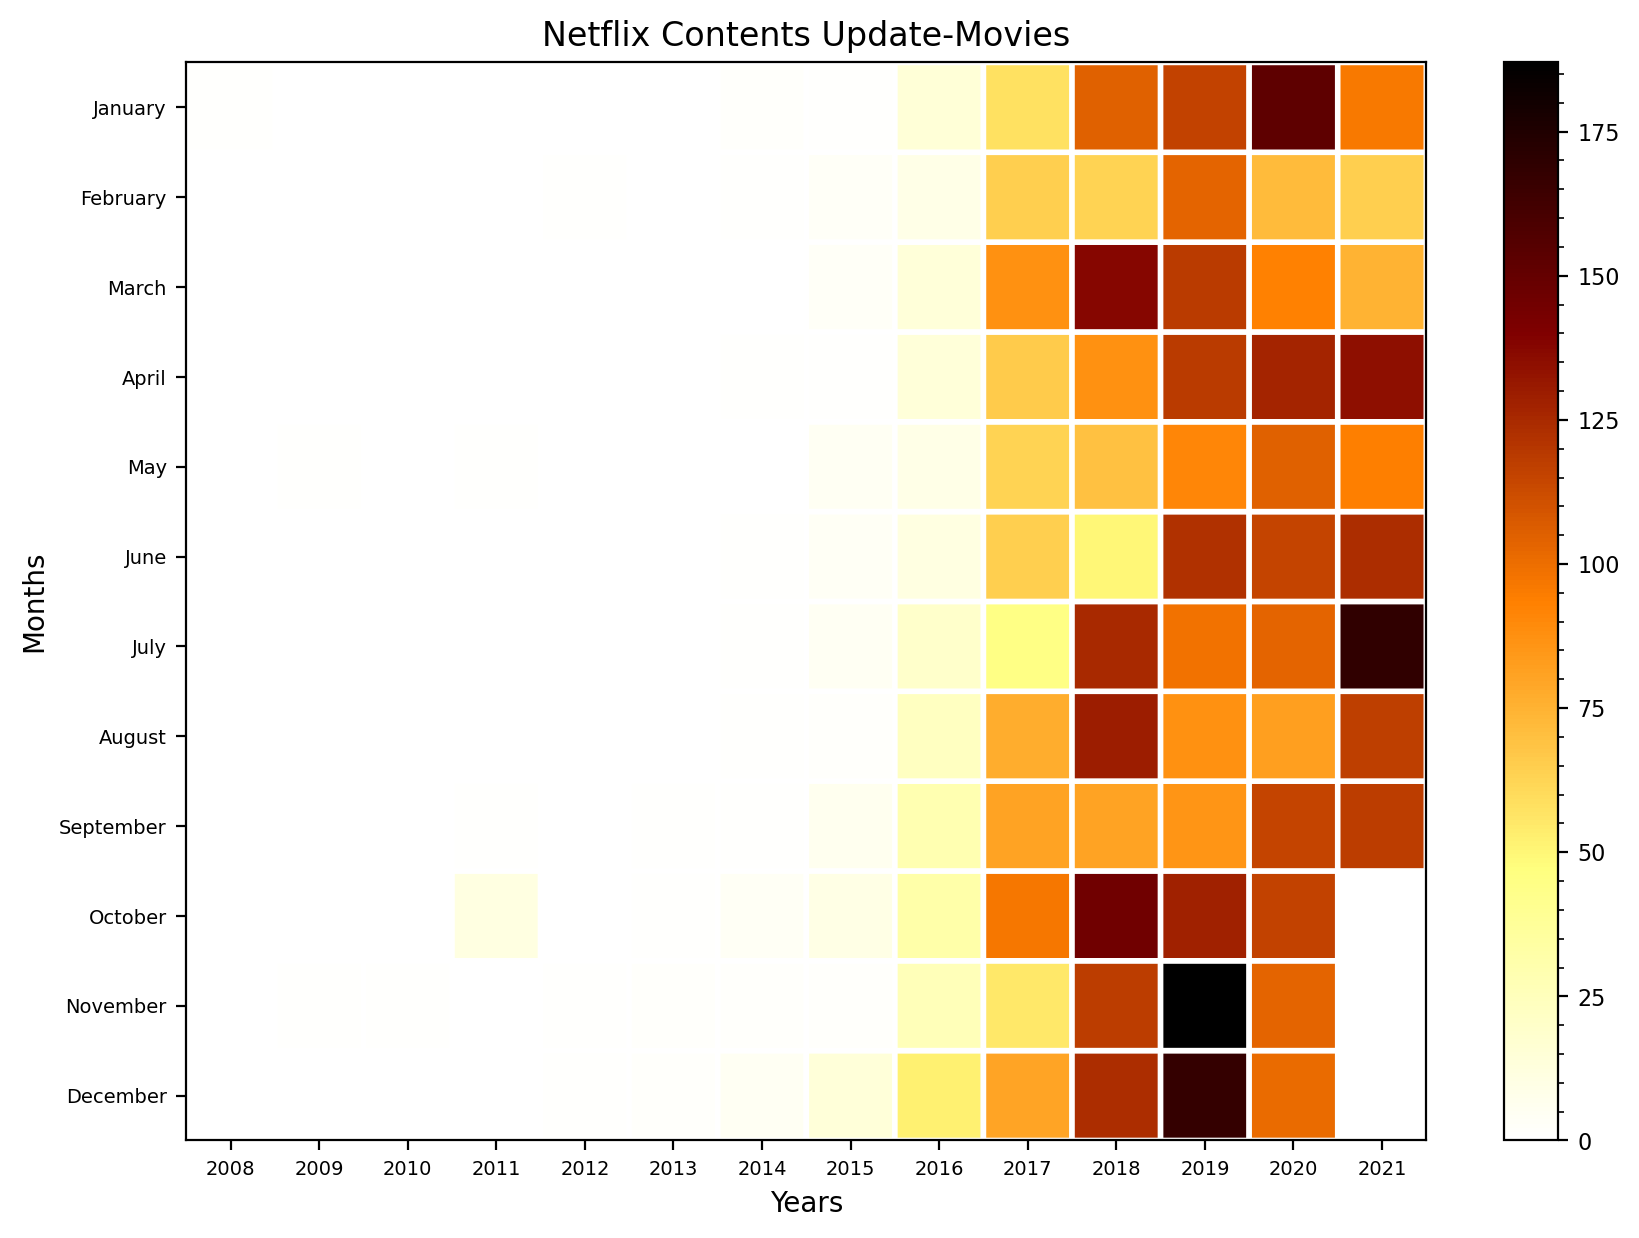

In [ ]:
# Presenting a heat map for Movies to get the best time to release a new Movie on netflix.
nt_mov=df[df['type']=='Movie']

netflix_date = nt_mov[['date_added']].dropna()      # Since there were only 10 nulls in date_added so we can remove nulls.
netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.strftime('%B')  # Convert month to full month name

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_movv = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)


plt.pcolor(df_movv, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_movv.columns), 1), df_movv.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df_movv.index), 1), df_movv.index, fontsize=7)
plt.xlabel('Years')
plt.ylabel('Months')

plt.title('Netflix Contents Update-Movies')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### Insights- For a new movie release 1st quarter of the year would be suitable as the number of releases are less, the viewers may like to see some new content.

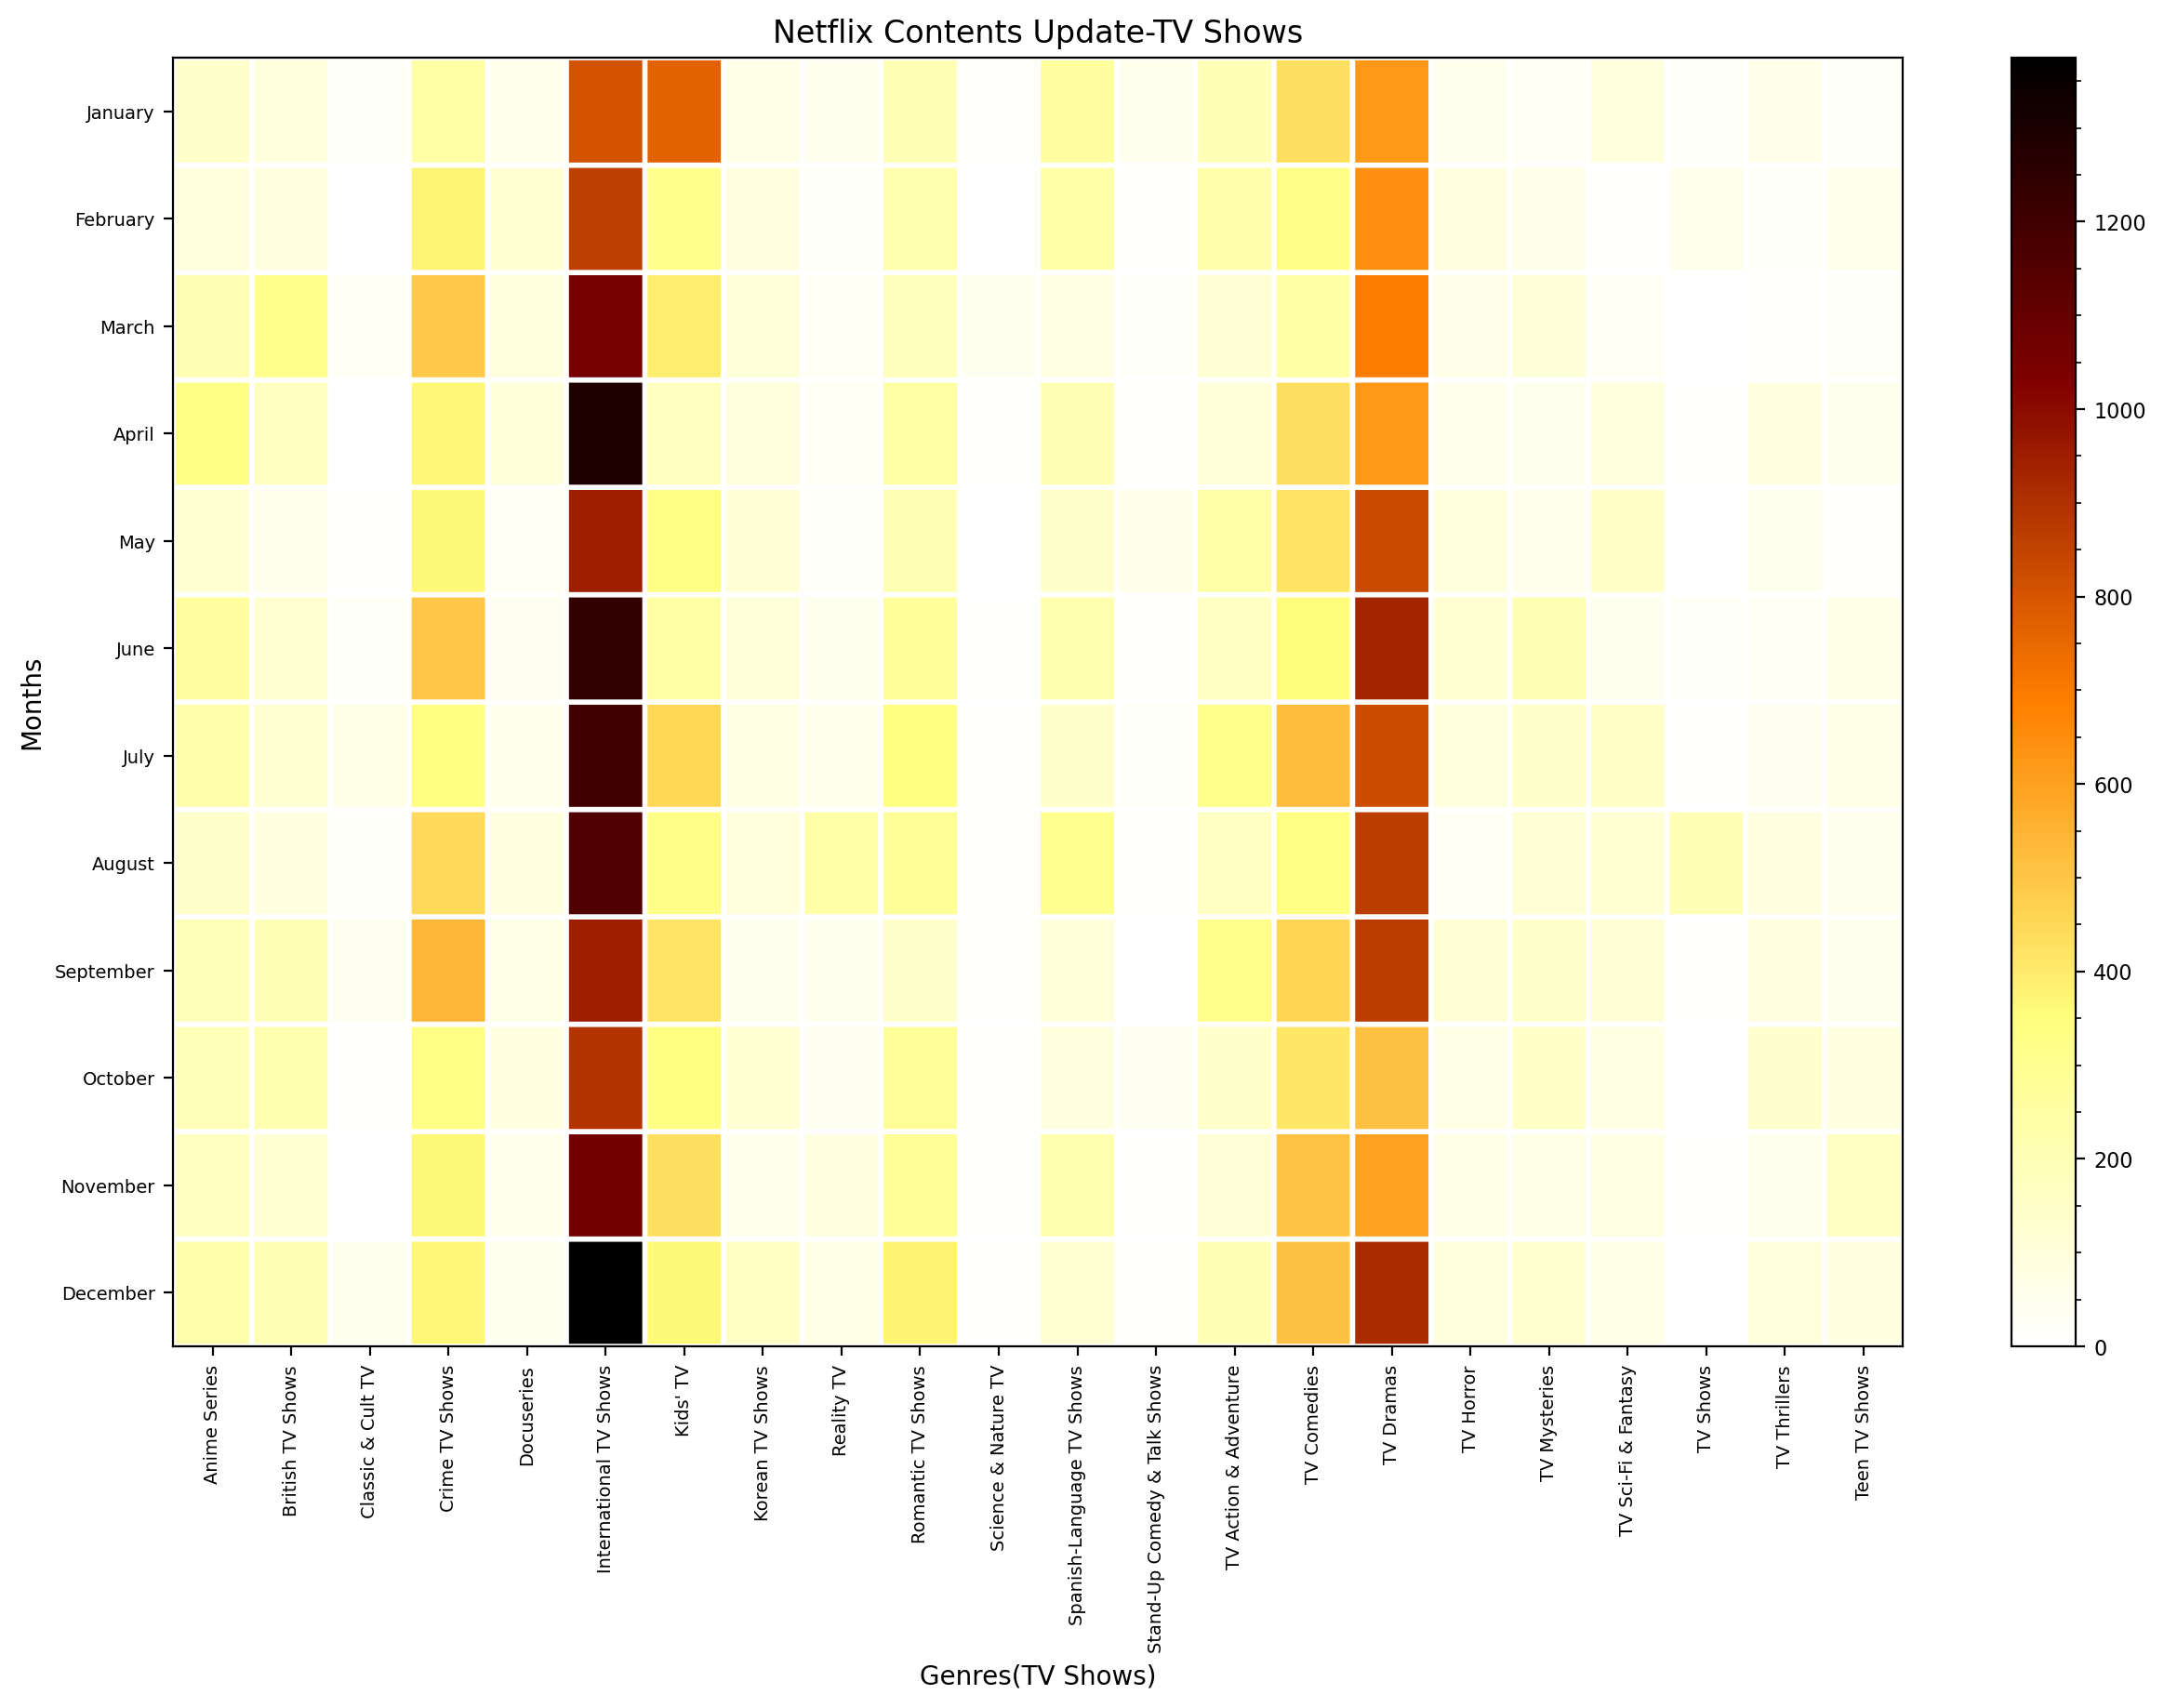

In [ ]:
# Presenting a heatmap for the genre v/s the TV Shows to see which genre is released more in which month.
df_tvshow1 = df_tvshow.copy()
df_tvshow1.loc[:, 'monthname'] = df_tvshow['date_added'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_tvdg = df_tvshow.groupby('genre')['monthname'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 9), dpi=200)

plt.pcolor(df_tvdg, cmap='afmhot_r', edgecolors='white', linewidths=2)     # heatmap
plt.xticks(np.arange(0.5, len(df_tvdg.columns), 1), df_tvdg.columns, fontsize=7, rotation=90)
plt.yticks(np.arange(0.5, len(df_tvdg.index), 1), df_tvdg.index, fontsize=7)
plt.ylabel('Months')
plt.xlabel('Genres(TV Shows)')

plt.title('Netflix Contents Update-TV Shows')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### Insights- From the above heatmap we can say that most of the TV Shows are of International shows and TV Dramas. Also shows from these two geners are released throught the year constantly. And Kids TV shows are mostly released in the month of january.

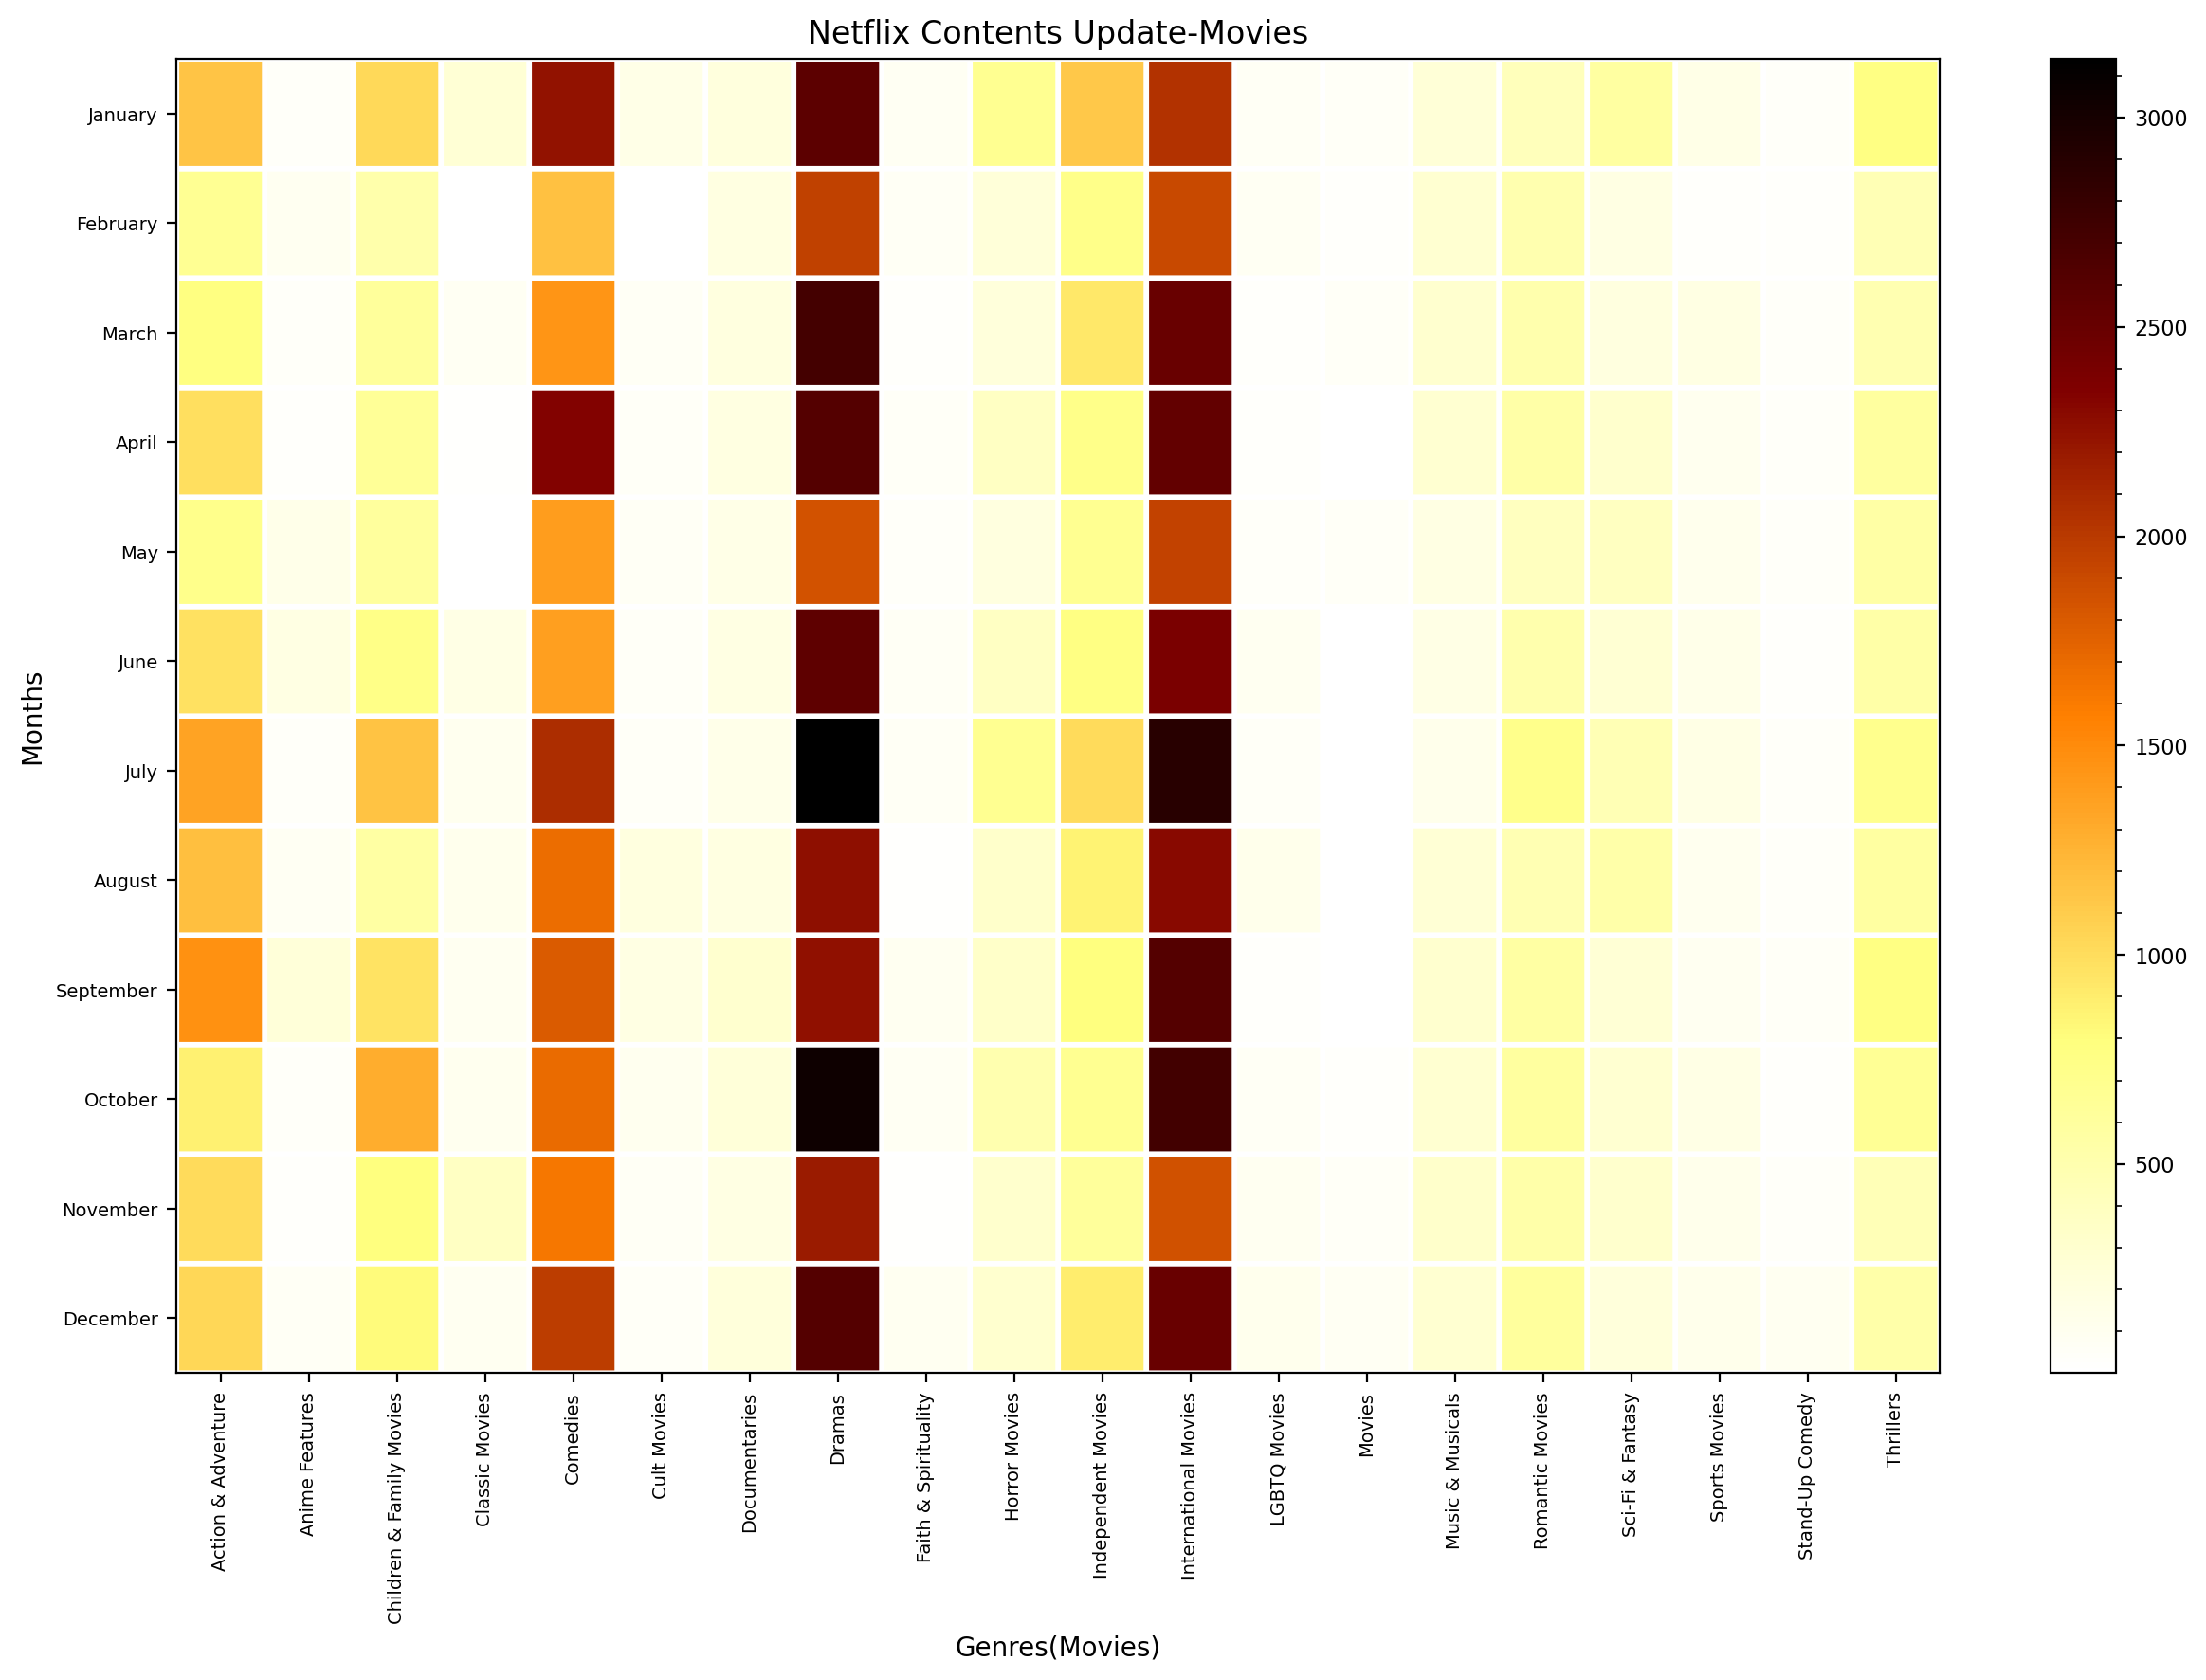

In [ ]:
# Presenting a heatmap for the genre v/s the Movies to see which genre is released more in which month.
df_movies1 = df_movies.copy()
df_movies1.loc[:, 'monthname'] = df_movies1['date_added'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_movvg = df_movies1.groupby('genre')['monthname'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 9), dpi=200)

plt.pcolor(df_movvg, cmap='afmhot_r', edgecolors='white', linewidths=2)     # heatmap
plt.xticks(np.arange(0.5, len(df_movvg.columns), 1), df_movvg.columns, fontsize=7, rotation=90)
plt.yticks(np.arange(0.5, len(df_movvg.index), 1), df_movvg.index, fontsize=7)
plt.ylabel('Months')
plt.xlabel('Genres(Movies)')
plt.title('Netflix Contents Update-Movies')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### Insights- Most of the movies are from only three genres i.e. Dramas, International movies and comedy. And also the movies of these geners are released constantly throught the year.

## 5. Business Insights
1. Currently netflix is operating in 124 countries as per the data.

2. Shortest movie- Silent and its duration is of 3 minutesand the
longest movie is Black Mirror and its duration is of 312 minutes.

3. There are 14 different types of ratings available and Most of the movies and TV shows available on Netflix are of TV-MA or TV-14 rating. Least used ratings are NC-17 and UR.

4. There are 42 different categories of genre available and Mostly the movies/series produced/available on netflix platform are of 'International movies','comedy' and 'dramas' category. And the least touched categories are TV shows and Stand-up shows.

5. The contribution of 'Movie' type content is about almost 70%.

6. Maximum number of movies are produced in USA followed by India and UK.

7. David Attenborough is the actor who has worked in maximum number of Movies and TV Shows.

8. Anupam Kher, Shar rukh khan, Julie Tejwani, Naseeruddin Shah and Rupa Bhimani are the Indian actors in top 15 list of most popular actors.

9. Most popular director for both Movies and TV Shows is Hiroyuki Seshita.

10. Number of movies/Shows produced were growing from 2015 to 2019 constantly and rapidly. Maximum number of movies were produced in the year 2019. But after the year 2019, there has been a fall in the movies produced may be probably due to the outburst of COVID19 by the end of the year 2019.

11. Most of the content is added in first and last month of the year. Hiroyuki Seshita and Rajiv Chilaka are the 2 most famous directors in india and Anupam Kher while Shah Rukh Khan are the 2 most popular actors from india.

12. Movies released are significantly more that the number of TV Shows released in recent years upto 2019. And then after there is a drop may be due to the COVID 19 pandamic outbreak. number of movies released per month is much greater that the number of TV Shows released.

13. In the recent years, since there are less release of the new TV Shows during the first quater of the year i.e. January, Feb and March. So if any producer needs to release a new content on the netflix, then he could release them during the first quarter of the year as there will be least competition during that time.

14. For a new Movie release 1st quarter of the year would be suitable as the number of releases are less, the viewers may like to see some new content.
most of the TV Shows are of International shows and TV Dramas. Also shows from these two geners are released throught the year constantly. And Kids TV shows are mostly released in the month of january.

15. Most of the movies are from only three genres i.e. Dramas, International movies and comedy. And also the movies of these geners are released constantly throught the year.


## 6. Recommendations

1. The content producers should focus on the most popular Geners across the countries in both Movies and TV shows categories are International Movies, International shows,  Dramas & Comedy.
2. Add new TV Shows in the first 2 months or in the month of may and new Movies in the first two months of the year.
3. The movies produced should have the duration/run-time in the range of 80-120 minutes.
4. If any director wants to launch his/her Movie of genre 'International Movies', then they should be released it during January or febuary.
5. If any director wants to release a TV Show in the genre of 'International TV Shows' or 'TV Dramas', then on netflix then they should try to launch them in January where they can have the least competition.
6. The target audience in most of the countries should be 14+ and mature.
7. For India, most of the content should be of ['International Movies','Dramas','Comedy'] category and TV_14 or TV-MA ratings.
8. While creating any content for some pirticular genre then, consider the most popular actors and directors for that content.
9. Since most of the content is focused on the adults and 14+, netflix should consider producing good content for kids(TV-Y7) in the categories like 'Anime'etc which can increase the user base/subscribers.